In [2]:
## imports

import sys
import os
import numpy as np
import xarray as xr
import pandas as pd
import cmocean
import matplotlib
import matplotlib.pyplot as plt

# from matplotlib import gridspec
# from matplotlib.gridspec import GridSpec
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# import matplotlib.colors as colors
import cartopy
import cartopy.crs as ccrs
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# import matplotlib.ticker as mticker
# import cartopy.mpl.ticker as cticker
# from cartopy.util import add_cyclic_point as cyclic
import cftime
# import nc_time_axis
import datetime

# # import time
# # import glob, os
# # import math
# import copy

# from sklearn.metrics import r2_score
# import scipy.interpolate as scp
# from scipy.stats import skew
# from scipy.ndimage.filters import gaussian_filter

# import eofs
# from eofs.xarray import Eof

%load_ext autoreload
%autoreload 2

In [3]:
from defs import change_lons, change_lons2

In [ ]:
# CCSM4
# PlioMIP2-SLP/CCSM4/E280/b40.B1850.f09_g16.preind.cam.h0.PSL.0081.0180.nc
# PlioMIP2-SLP/CCSM4/Eoi400/b40.B1850.f09_g16.PMIP4-pliomip2.PSL.1001.1100.nc

# folder = 'PlioMIP2 data/'
# model = 'CCSM4-UoT/'
# pi = 'E280/psl_Amon_UofT-CCSM4_piControl_r1i1p1f1_gr1_150101-160012.nc'
# plio = 'Eoi400/psl_Amon_UofT-CCSM4_midPliocene-eoi400_r1i1p1f1_gr1_160101-170012.nc'

# CCSM4-Utr 
# note: 200y
# PlioMIP2-SLP/CCSM4-Utr/E280/E280p_200y_atm.nc
# PlioMIP2-SLP/CCSM4-Utr/Eoi400/Eoi400_200y_atm.nc

# CESM1.2
# PlioMIP2-SLP/CESM1.2/E280/b.e12.B1850.f09_g16.preind.PSL.0701.0800.nc
# PlioMIP2-SLP/CESM1.2/Eoi400/b.e12.B1850.f09_g16.PMIP4-pliomip2.cam.h0.PSL.1101.1200.nc

# CESM2
# folder = 'PlioMIP2 data/'
# model = 'CESM2/'
# pi = 'E280/b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.h0.PSL.110001-120012.nc'
# plio = 'Eoi400/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.cam.h0.PSL.1101.1200.nc'

# COSMOS
# PlioMIP2-SLP/COSMOS/E280/E280.MeanSealevelPressure_CMIP6_name_psl_2650-2749_monthly_mean_time_series.nc
# PlioMIP2-SLP/COSMOS/Eoi400/Eoi400.MeanSealevelPressure_CMIP6_name_psl_2650-2749_monthly_mean_time_series.nc

# EC-Earth3-LR
# separate files per year

# GISS2.1G
# 1-50 and 51-100
# PlioMIP2-SLP/GISS2.1G/E280/psl_Amon_GISS-E2-1-G_piControl_r1i1p1f1_gn_490101-495012.nc
# PlioMIP2-SLP/GISS2.1G/E280/psl_Amon_GISS-E2-1-G_piControl_r1i1p1f1_gn_495101-500012.nc
# PlioMIP2-SLP/GISS2.1G/Eoi400/psl_Amon_GISS-E2-1-G_midPliocene-eoi400_r1i1p1f1_gn_305101-310012.nc
# PlioMIP2-SLP/GISS2.1G/Eoi400/psl_Amon_GISS-E2-1-G_midPliocene-eoi400_r1i1p1f1_gn_310101-315012.nc

# HadCM3
# separate files per year
# How to decode time??

# HadGEM3
# have to get monthly files!!!!

# IPSL-CM5A
# PlioMIP2-SLP/IPSL-CM5A/E280/PI.Sealevelpressure_slp_3600_3699_monthly_TS.nc
# PlioMIP2-SLP/IPSL-CM5A/Eoi400/Eoi400.Sealevelpressure_slp_3581_3680_monthly_TS.nc

# IPSL-CM5A2
# PlioMIP2-SLP/IPSL-CM5A2/E280/PI.Sealevelpressure_slp_6110_6209_monthly_TS.nc
# PlioMIP2-SLP/IPSL-CM5A2/Eoi400/Eoi400.Sealevelpressure_slp_3381_3480_monthly_TS.nc

# IPSL-CM6A
# PlioMIP2-SLP/IPSL-CM6A/E280/psl_Amon_IPSL-CM6A-LR_piControl_r1i1p1f1_gr_355001-384912.nc
# PlioMIP2-SLP/IPSL-CM6A/Eoi400/psl_Amon_IPSL-CM6A-LR_midPliocene-eoi400_r1i1p1f1_gr_185001-204912.nc

# MIROC4m
# PlioMIP2-SLP/MIROC4m/E280/MIROC4m_E280_Amon_psl.nc
# PlioMIP2-SLP/MIROC4m/Eoi400/MIROC4m_Eoi400_Amon_psl.nc

# MRI-GCGM2.3
# separate files

# NorESM-L
# PlioMIP2-SLP/NorESM-L/E280/NorESM-L_E280_PSL.nc
# PlioMIP2-SLP/NorESM-L/Eoi400/NorESM-L_Eoi400_PSL.nc

# NorESM1-F
# PlioMIP2-SLP/NorESM1-F/E280/NorESM1-F_E280_PSL.nc
# PlioMIP2-SLP/NorESM1-F/Eoi400/NorESM1-F_Eoi400_PSL.nc

In [4]:
modellist = ['CCSM4', 'CCSM4-UoT', 'CCSM4-Utr', 'CESM1.2', 
             'CESM2', 'COSMOS', 'EC-Earth3-LR', 'GISS2.1G',
             'HadCM3', 'HadGEM3', 'IPSL-CM5A', 'IPSL-CM5A2',
             'IPSL-CM6A', 'MIROC4m', 'MRI-GCGM2.3',
             'NorESM-L', 'NorESM1-F']


In [5]:
kgms_2_mmday = 86400;
ms_2_mmday   = 86400000;

# Load monthly SLP data and save

In [6]:
length = 1200; start_date = '31/1/2001';
time = pd.date_range(start = start_date, periods=length, freq='M')
dummy_time=xr.Dataset({"time": time})

## CCSM4

## SLP

In [10]:
## CCSM4

# in Pa
# lat and lon ok

folder = 'PlioMIP2 data/'
model = 'CCSM4'

# E280
sim = 'E280'
pi = 'b40.B1850.f09_g16.preind.cam.h0.PSL.0081.0180.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi).sortby("lat")

slp = 0.01*ds.PSL
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')


# Eoi400
sim = 'Eoi400'
plio = 'b40.B1850.f09_g16.PMIP4-pliomip2.PSL.1001.1100.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio).sortby("lat")

slp = 0.01*ds.PSL
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc', mode = 'w')

## Prect

In [10]:
## CCSM4

# lat and lon ok
# in m/s

folder = 'PlioMIP2 data/'
model = 'CCSM4'

# E280
sim = 'E280'
precL = 'b40.B1850.f09_g16.preind.cam.h0.PRECL.0081.0180.nc'
dsl = xr.open_dataset(folder+model+'/'+sim+'/'+precL).sortby("lat")
precC = 'b40.B1850.f09_g16.preind.cam.h0.PRECC.0081.0180.nc'
dsc = xr.open_dataset(folder+model+'/'+sim+'/'+precC).sortby("lat")

prect = ms_2_mmday * (dsl.PRECL + dsc.PRECC)
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = dsl.lat,
                           lon  = dsl.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')


# Eoi400
sim = 'Eoi400'
precL = 'b40.B1850.f09_g16.PMIP4-pliomip2.PRECL.1001.1100.nc'
dsl = xr.open_dataset(folder+model+'/'+sim+'/'+precL).sortby("lat")
precC = 'b40.B1850.f09_g16.PMIP4-pliomip2.PRECC.1001.1100.nc'
dsc = xr.open_dataset(folder+model+'/'+sim+'/'+precC).sortby("lat")

prect = ms_2_mmday * (dsl.PRECL + dsc.PRECC)
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = dsl.lat,
                           lon  = dsl.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc', mode = 'w')

## CCSM4-UoT

## SLP 

In [7]:
## CCSM4

# in Pa
# lat and lon ok

folder = 'PlioMIP2 data/'
model = 'CCSM4-UoT'

# E280
# sim = 'E280'
# pi = 'psl_Amon_UofT-CCSM4_piControl_r1i1p1f1_gr1_150101-160012.nc'
# ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi).sortby("lat")

# slp = 0.01*ds.psl
# data = xr.DataArray(data = slp,
#              dims = ["time", "lat", "lon"],
#              coords = dict(time = dummy_time.time,
#                            lat  = ds.lat,
#                            lon  = ds.lon),
#              attrs = dict(units = 'hPa',
#                           description = 'Sea-level pressure'))

# ds = data.to_dataset(name='slp')
# ds.attrs['model'] = model
# ds.attrs['sim'] = sim
# ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')


# # Eoi400
# sim = 'Eoi400'
# plio = 'psl_Amon_UofT-CCSM4_midPliocene-eoi400_r1i1p1f1_gr1_160101-170012.nc'
# ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio).sortby("lat")

# slp = 0.01*ds.psl
# data = xr.DataArray(data = slp,
#              dims = ["time", "lat", "lon"],
#              coords = dict(time = dummy_time.time,
#                            lat  = ds.lat,
#                            lon  = ds.lon),
#              attrs = dict(units = 'hPa',
#                           description = 'Sea-level pressure'))

# ds = data.to_dataset(name='slp')
# ds.attrs['model'] = model
# ds.attrs['sim'] = sim
# ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc', mode = 'w')

# E400
sim = 'E400'
plio = 'psl_Amon_UofT-CCSM4_PlioMIP2-E400_r1i1p1f1_gn_150101-160012.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio).sortby("lat")

slp = 0.01*ds.psl
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E400_slp_monthly.nc', mode = 'w')

/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'psl' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


## Prect

In [8]:
## CCSM4

# in kg m-2 s-1
# lat and lon ok

folder = 'PlioMIP2 data/'
model = 'CCSM4-UoT'

# E280
# sim = 'E280'
# pi = 'pr_Amon_UofT-CCSM4_piControl_r1i1p1f1_gr1_150101-160012.nc'
# ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi).sortby("lat")

# prect = kgms_2_mmday * ds.pr
# data = xr.DataArray(data = prect,
#              dims = ["time", "lat", "lon"],
#              coords = dict(time = dummy_time.time,
#                            lat  = ds.lat,
#                            lon  = ds.lon),
#              attrs = dict(units = 'mm/day',
#                           description = 'Total precipitation'))

# ds = data.to_dataset(name='prect')
# ds.attrs['model'] = model
# ds.attrs['sim'] = sim
# ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')


# # Eoi400
# sim = 'Eoi400'
# plio = 'pr_Amon_UofT-CCSM4_midPliocene-eoi400_r1i1p1f1_gr1_160101-170012.nc'
# ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio).sortby("lat")

# prect = kgms_2_mmday * ds.pr
# data = xr.DataArray(data = prect,
#              dims = ["time", "lat", "lon"],
#              coords = dict(time = dummy_time.time,
#                            lat  = ds.lat,
#                            lon  = ds.lon),
#              attrs = dict(units = 'mm/day',
#                           description = 'Total precipitation'))

# ds = data.to_dataset(name='prect')
# ds.attrs['model'] = model
# ds.attrs['sim'] = sim
# ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc', mode = 'w')


# E400
sim = 'E400'
plio = 'pr_Amon_UofT-CCSM4_PlioMIP2-E400_r1i1p1f1_gn_150101-160012.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio).sortby("lat")

prect = kgms_2_mmday * ds.pr
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E400_prect_monthly.nc', mode = 'w')

/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


## CCSM4-Utr

## SLP

In [5]:
## CCSM4

# in Pa
# lat lon ok

folder = 'PlioMIP2 data/'
model = 'CCSM4-Utr'

## NOTE: E280 data from Snellius

# E280
# sim = 'E280'
# pi = 'E280p_MSLP_6401_6500.nc'
# ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi).sortby("lat")

# slp = ds.mslp
# data = xr.DataArray(data = slp,
#              dims = ["time", "lat", "lon"],
#              coords = dict(time = dummy_time.time,
#                            lat  = ds.lat,
#                            lon  = ds.lon),
#              attrs = dict(units = 'hPa',
#                           description = 'Sea-level pressure'))

# ds = data.to_dataset(name='slp')
# ds.attrs['model'] = model
# ds.attrs['sim'] = sim
# ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')


# Eoi400
# sim = 'Eoi400'
# plio = 'Eoi400_200y_atm.nc'
# ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio).sortby("lat")

# # year 1901 - 2000 = PlioMIP2 server Eoi400 SST data years
# slp = 0.01*ds.SLP.isel(time=slice(52*12,-48*12))

# data = xr.DataArray(data = slp,
#              dims = ["time", "lat", "lon"],
#              coords = dict(time = dummy_time.time,
#                            lat  = ds.lat,
#                            lon  = ds.lon),
#              attrs = dict(units = 'hPa',
#                           description = 'Sea-level pressure'))

# ds = data.to_dataset(name='slp')
# ds.attrs['model'] = model
# ds.attrs['sim'] = sim
# ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc', mode = 'w')

# Eoi280
sim = 'Eoi280'
pi = 'Eoi280_200y_atm.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi).sortby("lat")

slp = 0.01*ds.SLP.isel(time=slice(0*12, 100*12))
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi280_slp_monthly.nc', mode = 'w')

/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/xarray/core/indexing.py:560: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


## Prect

In [13]:
## CCSM4

# in kg m-2 s-1
# lat lon ok

folder = 'PlioMIP2 data/'
model = 'CCSM4-Utr'

## NOTE: E280 data from Snellius

# E280
sim = 'E280'
pi = 'E280p_TotalPrecip_6401_6500.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi).sortby("lat")

prect = kgms_2_mmday * ds.pr
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')


# Eoi400
sim = 'Eoi400'
plio = 'Eoi400_200y_atm.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio).sortby("lat")

# year 1901 - 2000 = PlioMIP2 server Eoi400 SST data years
prect = kgms_2_mmday*ds.PRECT.isel(time=slice(52*12,-48*12))

data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc', mode = 'w')


## CESM1.2

## SLP

In [322]:
## CESM1.2

# in Pa
# lat and lon ok

## starts at feb -- ACTUALLY JAN MEAN!
# length = 1200; start_date = '27/2/2001';
# time_ = pd.date_range(start = start_date, periods=length, freq='M')
# dummy_time_=xr.Dataset({"time": time_})

folder = 'PlioMIP2 data/'
model = 'CESM1.2'

# E280
sim = 'E280'
pi = 'b.e12.B1850.f09_g16.preind.PSL.0701.0800.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi).sortby("lat")


slp = 0.01*ds.PSL
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')

# Eoi400
sim = 'Eoi400'
plio = 'b.e12.B1850.f09_g16.PMIP4-pliomip2.cam.h0.PSL.1101.1200.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio).sortby("lat")

slp = 0.01*ds.PSL
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc', mode = 'w')

## Prect


In [15]:
## CESM1.2

# in m/s
# lat and lon ok

## starts at feb -- ACTUALLY JAN MEAN!
# length = 1200; start_date = '27/2/2001';
# time_ = pd.date_range(start = start_date, periods=length, freq='M')
# dummy_time_=xr.Dataset({"time": time_})

folder = 'PlioMIP2 data/'
model = 'CESM1.2'

# E280
sim = 'E280'
precL =  'b.e12.B1850.f09_g16.preind.cam.h0.PRECL.0701.0800.nc'
dsl = xr.open_dataset(folder+model+'/'+sim+'/'+precL).sortby("lat")
precC = 'b.e12.B1850.f09_g16.preind.cam.h0.PRECC.0701.0800.nc'
dsc = xr.open_dataset(folder+model+'/'+sim+'/'+precC).sortby("lat")

prect = ms_2_mmday * (dsl.PRECL + dsc.PRECC)
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = dsl.lat,
                           lon  = dsl.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')

# Eoi400
sim = 'Eoi400'
precL =  'b.e12.B1850.f09_g16.PMIP4-pliomip2.cam.h0.PRECL.1101.1200.nc'
dsl = xr.open_dataset(folder+model+'/'+sim+'/'+precL).sortby("lat")
precC = 'b.e12.B1850.f09_g16.PMIP4-pliomip2.cam.h0.PRECC.1101.1200.nc'
dsc = xr.open_dataset(folder+model+'/'+sim+'/'+precC).sortby("lat")

prect = ms_2_mmday * (dsl.PRECL + dsc.PRECC)
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = dsl.lat,
                           lon  = dsl.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc', mode = 'w')

## CESM2

## SLP

In [323]:
## CESM2

# in Pa
# lat and lon ok

# e280 starts at feb, but also one extra year  -- ACTUALLY JAN MEAN!

folder = 'PlioMIP2 data/'
model = 'CESM2'

# E280
sim = 'E280'
pi = 'b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.h0.PSL.110001-120012.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi).sortby("lat")

slp = 0.01*ds.PSL.isel(time = slice(0,1200))
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')

# Eoi400
sim = 'Eoi400'
plio = 'b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.cam.h0.PSL.1101.1200.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio).sortby("lat")

slp = 0.01*ds.PSL
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc', mode = 'w')

## Prect

In [16]:
## CESM2

# in m/s
# lat and lon ok

# e280 starts at feb, but also one extra year  -- ACTUALLY JAN MEAN!

folder = 'PlioMIP2 data/'
model = 'CESM2'

# E280
sim = 'E280'
pi = 'b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.h0.PRECT.110001-120012.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi).sortby("lat")

prect = ms_2_mmday * ds.PRECT.isel(time = slice(0,1200))
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')

# Eoi400
sim = 'Eoi400'
precc = 'b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.cam.h0.PRECC.1101.1200.nc'
ds_c = xr.open_dataset(folder+model+'/'+sim+'/'+precc).sortby("lat")
precl = 'b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.cam.h0.PRECL.1101.1200.nc'
ds_l = xr.open_dataset(folder+model+'/'+sim+'/'+precl).sortby("lat")

prect = ms_2_mmday * (ds_c.PRECC + ds_l.PRECL)
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds_c.lat,
                           lon  = ds_c.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc', mode = 'w')

## COSMOS

## SLP

In [9]:
## COSMOS

#already in hPa
# lon ok, lat has to be sorted

folder = 'PlioMIP2 data/'
model = 'COSMOS'

# E280
# sim = 'E280'
# pi = 'E280.MeanSealevelPressure_CMIP6_name_psl_2650-2749_monthly_mean_time_series.nc'
# ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi).sortby("lat")

# slp = ds.psl
# data = xr.DataArray(data = slp,
#              dims = ["time", "lat", "lon"],
#              coords = dict(time = dummy_time.time,
#                            lat  = ds.lat,
#                            lon  = ds.lon),
#              attrs = dict(units = 'hPa',
#                           description = 'Sea-level pressure'))

# ds = data.to_dataset(name='slp')
# ds.attrs['model'] = model
# ds.attrs['sim'] = sim
# ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')

# # Eoi400
# sim = 'Eoi400'
# plio = 'Eoi400.MeanSealevelPressure_CMIP6_name_psl_2650-2749_monthly_mean_time_series.nc'
# ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio).sortby("lat")

# slp = ds.psl
# data = xr.DataArray(data = slp,
#              dims = ["time", "lat", "lon"],
#              coords = dict(time = dummy_time.time,
#                            lat  = ds.lat,
#                            lon  = ds.lon),
#              attrs = dict(units = 'hPa',
#                           description = 'Sea-level pressure'))

# ds = data.to_dataset(name='slp')
# ds.attrs['model'] = model
# ds.attrs['sim'] = sim
# ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc', mode = 'w')



# Eoi280
# sim = 'Eoi280'
# pi = 'Eoi280.MeanSealevelPressure_CMIP6_name_psl_2650-2749_monthly_mean_time_series.nc'
# ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi).sortby("lat")

# slp = ds.psl
# data = xr.DataArray(data = slp,
#              dims = ["time", "lat", "lon"],
#              coords = dict(time = dummy_time.time,
#                            lat  = ds.lat,
#                            lon  = ds.lon),
#              attrs = dict(units = 'hPa',
#                           description = 'Sea-level pressure'))

# ds = data.to_dataset(name='slp')
# ds.attrs['model'] = model
# ds.attrs['sim'] = sim
# ds.to_netcdf(folder+model+'/'+sim+'/Eoi280_slp_monthly.nc', mode = 'w')


# E400
sim = 'E400'
pi = 'E400.MeanSealevelPressure_CMIP6_name_psl_2650-2749_monthly_mean_time_series.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi).sortby("lat")

slp = ds.psl
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E400_slp_monthly.nc', mode = 'w')

## Prect

In [11]:
## COSMOS

#already in mm/day
# lon ok, lat has to be sorted

folder = 'PlioMIP2 data/'
model = 'COSMOS'

# E280
# sim = 'E280'
# pi = 'E280.TotalPrecip_CMIP6_name_pr_2650-2749_monthly_mean_time_series.nc'
# ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi).sortby("lat")

# prect = ds.pr
# data = xr.DataArray(data = prect,
#              dims = ["time", "lat", "lon"],
#              coords = dict(time = dummy_time.time,
#                            lat  = ds.lat,
#                            lon  = ds.lon),
#              attrs = dict(units = 'mm/day',
#                           description = 'Total precipitation'))

# ds = data.to_dataset(name='prect')
# ds.attrs['model'] = model
# ds.attrs['sim'] = sim
# ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')

# # Eoi400
# sim = 'Eoi400'
# plio = 'Eoi400.TotalPrecip_CMIP6_name_pr_2650-2749_monthly_mean_time_series.nc'
# ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio).sortby("lat")

# prect = ds.pr
# data = xr.DataArray(data = prect,
#              dims = ["time", "lat", "lon"],
#              coords = dict(time = dummy_time.time,
#                            lat  = ds.lat,
#                            lon  = ds.lon),
#              attrs = dict(units = 'mm/day',
#                           description = 'Total precipitation'))

# ds = data.to_dataset(name='prect')
# ds.attrs['model'] = model
# ds.attrs['sim'] = sim
# ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc', mode = 'w')

# E400
sim = 'E400'
plio = 'E400.TotalPrecip_CMIP6_name_pr_2650-2749_monthly_mean_time_series.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio).sortby("lat")

prect = ds.pr
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E400_prect_monthly.nc', mode = 'w')


## EC-Earth3

## SLP

In [48]:
## COSMOS

# in Pa
# lat, lon ok

# files per year

folder = 'PlioMIP2 data/'
model = 'EC-Earth3-LR'

# E280
# sim = 'E280'

# # get all files

# year_start = 2320
# file = 'psl_Amon_EC-Earth3-LR_piControl_r1i1p1f1_gr_'

# file0 = 'psl_Amon_EC-Earth3-LR_piControl_r1i1p1f1_gr_232001-232012.nc'
# ds = xr.open_dataset(folder+model+'/'+sim+'/'+file0, decode_times=False).psl

# ylen = 100
# for yi in range(1,ylen):

#     year = year_start + yi 
#     years = f'{year}01-{year}12.nc'
#     ds_ = xr.open_dataset(folder+model+'/'+sim+'/'+file+years, decode_times=False).psl
    
#     ds = xr.concat([ds, ds_], dim="time")

# slp = 0.01*ds.sortby("lat")
# data = xr.DataArray(data = slp,
#              dims = ["time", "lat", "lon"],
#              coords = dict(time = dummy_time.time,
#                            lat  = ds.lat,
#                            lon  = ds.lon),
#              attrs = dict(units = 'hPa',
#                           description = 'Sea-level pressure'))

# ds = data.to_dataset(name='slp')
# ds.attrs['model'] = model
# ds.attrs['sim'] = sim
# ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')

# Eoi400
sim = 'Eoi400'

# get all files

# year_start = 3307
# file = 'psl_Amon_EC-Earth3-LR_midPliocene-eoi400_r1i1p1f1_gr_'

# file0 = 'psl_Amon_EC-Earth3-LR_midPliocene-eoi400_r1i1p1f1_gr_330701-330712.nc'
# ds = xr.open_dataset(folder+model+'/'+sim+'/'+file0, decode_times=False).psl

# ylen = 100
# for yi in range(1,ylen):

#     year = year_start + yi 
#     years = f'{year}01-{year}12.nc'
#     ds_ = xr.open_dataset(folder+model+'/'+sim+'/'+file+years, decode_times=False).psl
    
#     ds = xr.concat([ds, ds_], dim="time")

file = 'EC-Earth3.3_mPlio_surface.nc'
ds   = xr.open_dataset(folder+model+'/'+sim+'/'+file)

ds=ds.sortby("lat")

slp = 0.01*ds.msl
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc')#, mode = 'w')

/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/numpy/core/_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


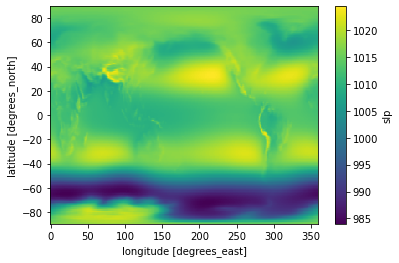

In [47]:
ds.slp.mean("time").plot()

## Prect

In [18]:
## EC Earth

# in kg m-2 s-1
# lat, lon ok

# files per year

folder = 'PlioMIP2 data/'
model = 'EC-Earth3-LR'

# E280
sim = 'E280'

# get all files

year_start = 2320
file = 'pr_Amon_EC-Earth3-LR_piControl_r1i1p1f1_gr_'
file0 = 'pr_Amon_EC-Earth3-LR_piControl_r1i1p1f1_gr_232001-232012.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+file0, decode_times=False).pr

ylen = 100
for yi in range(1,ylen):

    year = year_start + yi 
    years = f'{year}01-{year}12.nc'
    ds_ = xr.open_dataset(folder+model+'/'+sim+'/'+file+years, decode_times=False).pr
    
    ds = xr.concat([ds, ds_], dim="time")

prect = kgms_2_mmday * ds.sortby("lat")
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')

# Eoi400
sim = 'Eoi400'

#get all files

year_start = 3307
file = 'pr_Amon_EC-Earth3-LR_midPliocene-eoi400_r1i1p1f1_gr_'
file0 = 'pr_Amon_EC-Earth3-LR_midPliocene-eoi400_r1i1p1f1_gr_330701-330712.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+file0, decode_times=False).pr

ylen = 100
for yi in range(1,ylen):

    year = year_start + yi 
    years = f'{year}01-{year}12.nc'
    ds_ = xr.open_dataset(folder+model+'/'+sim+'/'+file+years, decode_times=False).pr
    
    ds = xr.concat([ds, ds_], dim="time")

# file = 'EC-Earth3.3_mPlio_surface.nc'
# ds   = xr.open_dataset(folder+model+'/'+sim+'/'+file)

prect = kgms_2_mmday * ds.sortby("lat")
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc')#, mode = 'w')

## GISS

## SLP

In [32]:
## GISS

# in Pa
# lat lon ok

# 50 and 50y

folder = 'PlioMIP2 data/'
model = 'GISS2.1G'

# E280
sim = 'E280'
pi1 = 'psl_Amon_GISS-E2-1-G_piControl_r1i1p1f1_gn_490101-495012.nc'
pi2 = 'psl_Amon_GISS-E2-1-G_piControl_r1i1p1f1_gn_495101-500012.nc'
ds1 = xr.open_dataset(folder+model+'/'+sim+'/'+pi1)
ds2 = xr.open_dataset(folder+model+'/'+sim+'/'+pi2)
ds = xr.concat([ds1, ds2], dim="time").sortby("lat")


slp = 0.01*ds.psl
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')

# Eoi400
sim = 'Eoi400'
plio1 = 'psl_Amon_GISS-E2-1-G_midPliocene-eoi400_r1i1p1f1_gn_305101-310012.nc'
plio2 = 'psl_Amon_GISS-E2-1-G_midPliocene-eoi400_r1i1p1f1_gn_310101-315012.nc'
ds1 = xr.open_dataset(folder+model+'/'+sim+'/'+plio1)
ds2 = xr.open_dataset(folder+model+'/'+sim+'/'+plio2)
ds = xr.concat([ds1, ds2], dim="time").sortby("lat")

slp = 0.01*ds.psl
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc', mode = 'w')


## Prect

In [19]:
## GISS

# in kg m-2 s-1
# lat lon ok

# 50 and 50y

folder = 'PlioMIP2 data/'
model = 'GISS2.1G'

# E280
sim = 'E280'
pi1 = 'pr_Amon_GISS-E2-1-G_piControl_r1i1p1f1_gn_490101-495012.nc'
pi2 = 'pr_Amon_GISS-E2-1-G_piControl_r1i1p1f1_gn_495101-500012.nc'
ds1 = xr.open_dataset(folder+model+'/'+sim+'/'+pi1)
ds2 = xr.open_dataset(folder+model+'/'+sim+'/'+pi2)
ds = xr.concat([ds1, ds2], dim="time").sortby("lat")

prect = kgms_2_mmday * ds.pr;
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')

# Eoi400
sim = 'Eoi400'
plio1 = 'pr_Amon_GISS-E2-1-G_midPliocene-eoi400_r1i1p1f1_gn_305101-310012.nc'
plio2 = 'pr_Amon_GISS-E2-1-G_midPliocene-eoi400_r1i1p1f1_gn_310101-315012.nc'
ds1 = xr.open_dataset(folder+model+'/'+sim+'/'+plio1)
ds2 = xr.open_dataset(folder+model+'/'+sim+'/'+plio2)
ds = xr.concat([ds1, ds2], dim="time").sortby("lat")

prect = kgms_2_mmday * ds.pr
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc', mode = 'w')


## HadCM3

## SLP

In [37]:
## HadCM3

# in Pa
# lon ok, lat has to be sorted

# files per year

folder = 'PlioMIP2 data/'
model = 'HadCM3'

# E280
sim = 'E280'

# get all files

file = 'e280_corr.MSLP.0'
file0 = 'e280_corr.MSLP.000.nc'

# file = 'e280.MSLP.0'
# file0 = 'e280.MSLP.000.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+file0, decode_times=False).p.isel(msl=0)

ylen = 100
for yi in range(1,ylen):

    if yi<10: years = f'0{yi}.nc';
    else:     years = f'{yi}.nc';
    
    ds_ = xr.open_dataset(folder+model+'/'+sim+'/'+file+years, decode_times=False).p.isel(msl=0)
    
    ds = xr.concat([ds, ds_], dim="t")

ds=ds.rename({"latitude":"lat"}).rename({"longitude":"lon"}).sortby("lat")
    
slp = 0.01*ds.sortby("lat")
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')

# Eoi400
sim = 'Eoi400'

# get all files

# file = 'eoi400.MSLP.0'

# file0 = 'eoi400.MSLP.000.nc'
# ds = xr.open_dataset(folder+model+'/'+sim+'/'+file0, decode_times=False).p.isel(msl=0)

# ylen = 100
# for yi in range(1,ylen):

#     if yi<10: years = f'0{yi}.nc';
#     else:     years = f'{yi}.nc';
    
#     ds_ = xr.open_dataset(folder+model+'/'+sim+'/'+file+years, decode_times=False).p.isel(msl=0)
    
#     ds = xr.concat([ds, ds_], dim="t")

# ds=ds.rename({"latitude":"lat"}).rename({"longitude":"lon"}).sortby("lat")
    
# slp = 0.01*ds.sortby("lat")
# data = xr.DataArray(data = slp,
#              dims = ["time", "lat", "lon"],
#              coords = dict(time = dummy_time.time,
#                            lat  = ds.lat,
#                            lon  = ds.lon),
#              attrs = dict(units = 'hPa',
#                           description = 'Sea-level pressure'))

# ds = data.to_dataset(name='slp')
# ds.attrs['model'] = model
# ds.attrs['sim'] = sim
# ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc', mode = 'w')


In [18]:
## HadCM3

# in Pa
# lon ok, lat has to be sorted

# files per year

folder = 'PlioMIP2 data/'
model = 'HadCM3'

# E280
sim = 'E280'

# get all files

file = 'e280_corr.MSLP.0'

file0 = 'e280_corr.MSLP.000.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+file0, decode_times=False).p.isel(msl=0)

In [12]:
## HadCM3

# in Pa
# lon ok, lat has to be sorted

# files per year

folder = 'PlioMIP2 data/'
model = 'HadCM3'

# Eoi280
# sim = 'Eoi280'

# # get all files

# file = 'eoi280.MSLP.0'
# file0 = 'eoi280.MSLP.000.nc'

# # file = 'e280.MSLP.0'
# # file0 = 'e280.MSLP.000.nc'
# ds = xr.open_dataset(folder+model+'/'+sim+'/'+file0, decode_times=False).p.isel(msl=0)

# ylen = 100
# for yi in range(1,ylen):

#     if yi<10: years = f'0{yi}.nc';
#     else:     years = f'{yi}.nc';
    
#     ds_ = xr.open_dataset(folder+model+'/'+sim+'/'+file+years, decode_times=False).p.isel(msl=0)
    
#     ds = xr.concat([ds, ds_], dim="t")

# ds=ds.rename({"latitude":"lat"}).rename({"longitude":"lon"}).sortby("lat")
    
# slp = 0.01*ds.sortby("lat")
# data = xr.DataArray(data = slp,
#              dims = ["time", "lat", "lon"],
#              coords = dict(time = dummy_time.time,
#                            lat  = ds.lat,
#                            lon  = ds.lon),
#              attrs = dict(units = 'hPa',
#                           description = 'Sea-level pressure'))

# ds = data.to_dataset(name='slp')
# ds.attrs['model'] = model
# ds.attrs['sim'] = sim
# ds.to_netcdf(folder+model+'/'+sim+'/Eoi280_slp_monthly.nc', mode = 'w')




# E400
sim = 'E400'

# get all files

file = 'e400.MSLP.0'
file0 = 'e400.MSLP.000.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+file0, decode_times=False).p.isel(msl=0)

ylen = 100
for yi in range(1,ylen):

    if yi<10: years = f'0{yi}.nc';
    else:     years = f'{yi}.nc';
    
    ds_ = xr.open_dataset(folder+model+'/'+sim+'/'+file+years, decode_times=False).p.isel(msl=0)
    
    ds = xr.concat([ds, ds_], dim="t")

ds=ds.rename({"latitude":"lat"}).rename({"longitude":"lon"}).sortby("lat")
    
slp = 0.01*ds.sortby("lat")
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E400_slp_monthly.nc', mode = 'w')



## Prect

In [20]:
## HadCM3

# in mm/day
# lon ok, lat has to be sorted

# files per year

folder = 'PlioMIP2 data/'
model = 'HadCM3'

# E280
sim = 'E280'

# get all files

file = 'e280_corr.TotalPrecipitation.0'
file0 = 'e280_corr.TotalPrecipitation.000.nc'

ds = xr.open_dataset(folder+model+'/'+sim+'/'+file0, decode_times=False).precip.isel(surface=0)

ylen = 100
for yi in range(1,ylen):

    if yi<10: years = f'0{yi}.nc';
    else:     years = f'{yi}.nc';
    
    ds_ = xr.open_dataset(folder+model+'/'+sim+'/'+file+years, decode_times=False).precip.isel(surface=0)
    
    ds = xr.concat([ds, ds_], dim="t")

ds=ds.rename({"latitude":"lat"}).rename({"longitude":"lon"}).sortby("lat")
    
prect = ds.sortby("lat")
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')

# Eoi400
sim = 'Eoi400'

# get all files

file = 'eoi400.TotalPrecipitation.0'
file0 = 'eoi400.TotalPrecipitation.000.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+file0, decode_times=False).precip.isel(surface=0)

ylen = 100
for yi in range(1,ylen):

    if yi<10: years = f'0{yi}.nc';
    else:     years = f'{yi}.nc';
    
    ds_ = xr.open_dataset(folder+model+'/'+sim+'/'+file+years, decode_times=False).precip.isel(surface=0)
    
    ds = xr.concat([ds, ds_], dim="t")

ds=ds.rename({"latitude":"lat"}).rename({"longitude":"lon"}).sortby("lat")
    
prect = ds.sortby("lat")
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc', mode = 'w')


## HadGEM3

## SLP

In [38]:
## HadGEM3

# in Pa
# lat lon ok

folder = 'PlioMIP2 data/'
model = 'HadGEM3'

# E280
sim = 'E280'
pi = 'times_hadgem3_pi_mslp_final.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi)

ds=ds.rename({"latitude":"lat"}).rename({"longitude":"lon"})

slp = 0.01*ds.p.isel(msl=0).sortby("lat")
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')

# # Eoi400
sim = 'Eoi400'
plio = 'times_hadgem3_pliocene_mslp_final.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio)

ds=ds.rename({"latitude":"lat"}).rename({"longitude":"lon"})

slp = 0.01*ds.p.isel(msl=0).sortby("lat")
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc', mode = 'w')

## Prect


In [21]:
## HadGEM3

# in kg m-2 s-1
# lat lon ok

folder = 'PlioMIP2 data/'
model = 'HadGEM3'

# E280
sim = 'E280'
pi = 'times_hadgem3_pi_precip_final.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi)

ds=ds.rename({"latitude":"lat"}).rename({"longitude":"lon"})

prect = kgms_2_mmday*ds.precip.isel(surface=0).sortby("lat")
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')

# # Eoi400
sim = 'Eoi400'
plio = 'times_hadgem3_pliocene_precip_final.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio)

ds=ds.rename({"latitude":"lat"}).rename({"longitude":"lon"})

prect = kgms_2_mmday*ds.precip.isel(surface=0).sortby("lat")
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc', mode = 'w')

## IPSL-CM5A

## SLP

In [49]:
## IPSL-CM5A

# in Pa
# lat has to be sorted, lon has to be changed

folder = 'PlioMIP2 data/'
model = 'IPSL-CM5A'

# E280
sim = 'E280'
pi = 'PI.Sealevelpressure_slp_3600_3699_monthly_TS.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi)

ds = ds.rename({"time_counter":"time"})
ds = change_lons2(ds).sortby("lat")

slp = 0.01*ds.slp
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')

# # Eoi400
sim = 'Eoi400'
plio = 'Eoi400.Sealevelpressure_slp_3581_3680_monthly_TS.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio, decode_times=False)

ds = ds.rename({"time_counter":"time"})
ds = change_lons2(ds).sortby("lat")

slp = 0.01*ds.slp
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc', mode = 'w')

## Prect

In [22]:
## IPSL-CM5A

# in kg m-2 s-1
# lat has to be sorted, lon has to be changed

folder = 'PlioMIP2 data/'
model = 'IPSL-CM5A'

# E280
sim = 'E280'
pi = 'PI.TotalPrecip_pr_3600_3699_monthly_TS.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi)

ds = ds.rename({"time_counter":"time"})
ds = change_lons2(ds).sortby("lat")

prect = kgms_2_mmday * ds.pr;
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')

# # Eoi400
sim = 'Eoi400'
plio = 'Eoi400.TotalPrecip_pr_3581_3680_monthly_TS.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio, decode_times=False)

ds = ds.rename({"time_counter":"time"})
ds = change_lons2(ds).sortby("lat")

prect = kgms_2_mmday * ds.pr;
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc', mode = 'w')

## IPSL-CM5A2

## SLP

In [54]:
## IPSL-CM5A2

# in Pa
# lat, lon has to be changed

folder = 'PlioMIP2 data/'
model = 'IPSL-CM5A2'

# E280
sim = 'E280'
pi = 'PI.Sealevelpressure_slp_6110_6209_monthly_TS.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi)

ds = ds.rename({"time_counter":"time"})
ds = change_lons2(ds).sortby("lat")

slp = 0.01*ds.slp
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')

# # Eoi400
sim = 'Eoi400'
plio = 'Eoi400.Sealevelpressure_slp_3381_3480_monthly_TS.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio)

ds = ds.rename({"time_counter":"time"})
ds = change_lons2(ds).sortby("lat")

slp = 0.01*ds.slp
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc', mode = 'w')

## Prect

In [23]:
## IPSL-CM5A2

# in kg m-2s-1
# lat, lon has to be changed

folder = 'PlioMIP2 data/'
model = 'IPSL-CM5A2'

# E280
sim = 'E280'
pi = 'PI.TotalPrecip_pr_6110_6209_monthly_TS.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi)

ds = ds.rename({"time_counter":"time"})
ds = change_lons2(ds).sortby("lat")

prect = kgms_2_mmday * ds.pr;
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')

# # Eoi400
sim = 'Eoi400'
plio = 'Eoi400.TotalPrecip_pr_3381_3480_monthly_TS.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio)

ds = ds.rename({"time_counter":"time"})
ds = change_lons2(ds).sortby("lat")

prect = kgms_2_mmday * ds.pr;
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc', mode = 'w')

## IPSL-CM6A

## SLP

In [30]:
## IPSL-CM6A

# in Pa
# lat, lon ok

folder = 'PlioMIP2 data/'
model = 'IPSL-CM6A'

# E280
# sim = 'E280'
# pi = 'psl_Amon_IPSL-CM6A-LR_piControl_r1i1p1f1_gr_355001-384912.nc'
# ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi, decode_times=False)

# ds = ds.isel(time=slice(0,1200))

# slp = 0.01*ds.psl
# data = xr.DataArray(data = slp,
#              dims = ["time", "lat", "lon"],
#              coords = dict(time = dummy_time.time,
#                            lat  = ds.lat,
#                            lon  = ds.lon),
#              attrs = dict(units = 'hPa',
#                           description = 'Sea-level pressure'))

# ds = data.to_dataset(name='slp')
# ds.attrs['model'] = model
# ds.attrs['sim'] = sim
# ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')

# # # Eoi400
sim = 'Eoi400'
plio = 'psl_Amon_IPSL-CM6A-LR_midPliocene-eoi400_r1i1p1f1_gr_185001-204912.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio, decode_times=False)


ds = ds.isel(time=slice(0,1200))

slp = 0.01*ds.psl
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc', mode = 'w')

## Prect

In [24]:
## IPSL-CM6A

# in kg m-2s-1
# lat, lon ok

folder = 'PlioMIP2 data/'
model = 'IPSL-CM6A'

# E280
sim = 'E280'
pi = 'pr_Amon_IPSL-CM6A-LR_piControl_r1i1p1f1_gr_355001-384912.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi, decode_times=False)

ds = ds.isel(time=slice(0,1200))

prect = kgms_2_mmday * ds.pr;
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')

# # # Eoi400
sim = 'Eoi400'
plio = 'pr_Amon_IPSL-CM6A-LR_midPliocene-eoi400_r1i1p1f1_gr_185001-204912.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio, decode_times=False)

ds = ds.isel(time=slice(0,1200))

prect = kgms_2_mmday * ds.pr;
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc', mode = 'w')

## MIROC4m

## SLP

In [60]:
## MIROC4m

# in hPa
# lon ok, lat has to be sorted

folder = 'PlioMIP2 data/'
model = 'MIROC4m'

# E280
sim = 'E280'
pi = 'MIROC4m_E280_Amon_psl.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi, decode_times=False).sortby("lat")

slp = ds.psl
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')

# # Eoi400
sim = 'Eoi400'
plio = 'MIROC4m_Eoi400_Amon_psl.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio, decode_times=False).sortby("lat")

slp = ds.psl
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc', mode = 'w')

## Prect

In [25]:
## MIROC4m

# in mm/day
# lon ok, lat has to be sorted

folder = 'PlioMIP2 data/'
model = 'MIROC4m'

# E280
sim = 'E280'
pi = 'MIROC4m_E280_Amon_pr.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi, decode_times=False).sortby("lat")

prect = ds.pr
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')

# # Eoi400
sim = 'Eoi400'
plio = 'MIROC4m_Eoi400_Amon_pr.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio, decode_times=False).sortby("lat")

prect = ds.pr;
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc', mode = 'w')

## MRI-GCGM2.3

## SLP

In [63]:
## MRI-GCGM2.3

# in hPa
# lat, lon ok

# files per year

folder = 'PlioMIP2 data/'
model = 'MRI-GCGM2.3'

# E280
sim = 'E280'

# get all files

file = 'e280.psl.0'

file0 = 'e280.psl.001.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+file0, decode_times=False).psl.isel(lev=0)

ylen = 100
for yi in range(1,ylen):

    if yi<10: years = f'0{yi}.nc';
    else:     years = f'{yi}.nc';
    
    ds_ = xr.open_dataset(folder+model+'/'+sim+'/'+file+years, decode_times=False).psl.isel(lev=0)
    
    ds = xr.concat([ds, ds_], dim="time")

slp = ds
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')

# # Eoi400
sim = 'Eoi400'

# get all files

file = 'eoi400.psl.0'

file0 = 'eoi400.psl.001.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+file0, decode_times=False).psl.isel(lev=0)

ylen = 100
for yi in range(1,ylen):

    if yi<10: years = f'0{yi}.nc';
    else:     years = f'{yi}.nc';
    
    ds_ = xr.open_dataset(folder+model+'/'+sim+'/'+file+years, decode_times=False).psl.isel(lev=0)
    
    ds = xr.concat([ds, ds_], dim="time")

slp = ds
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc', mode = 'w')


In [35]:
folder = 'PlioMIP2 data/'
model = 'MRI-GCGM2.3'

# E280
sim = 'E280'

# get all files

file = 'e280.psl.0'

file0 = 'e280.psl.001.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+file0, decode_times=False).psl.isel(lev=0)

## Prect

In [26]:
## MRI-GCGM2.3

# in mm/day
# lat, lon ok

# files per year

folder = 'PlioMIP2 data/'
model = 'MRI-GCGM2.3'

# E280
sim = 'E280'

# get all files

file = 'e280.pr.0'

file0 = 'e280.pr.001.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+file0, decode_times=False).pr.isel(lev=0)

ylen = 100
for yi in range(1,ylen):

    if yi<10: years = f'0{yi}.nc';
    else:     years = f'{yi}.nc';
    
    ds_ = xr.open_dataset(folder+model+'/'+sim+'/'+file+years, decode_times=False).pr.isel(lev=0)
    
    ds = xr.concat([ds, ds_], dim="time")

prect = ds
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')

# # Eoi400
sim = 'Eoi400'

# get all files

file = 'eoi400.pr.0'

file0 = 'eoi400.pr.001.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+file0, decode_times=False).pr.isel(lev=0)

ylen = 100
for yi in range(1,ylen):

    if yi<10: years = f'0{yi}.nc';
    else:     years = f'{yi}.nc';
    
    ds_ = xr.open_dataset(folder+model+'/'+sim+'/'+file+years, decode_times=False).pr.isel(lev=0)
    
    ds = xr.concat([ds, ds_], dim="time")

prect = ds
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc', mode = 'w')


## NorESM-L

## SLP

In [324]:
## NorESM-L

# inPa
#lat, lon ok

## starts at feb -- ACTUALLY JAN MEAN!
# length = 1200; start_date = '27/2/2001';
# time_ = pd.date_range(start = start_date, periods=length, freq='M')
# dummy_time_=xr.Dataset({"time": time_})

# in hPa

folder = 'PlioMIP2 data/'
model = 'NorESM-L'

# E280
sim = 'E280'
pi = 'NorESM-L_E280_PSL.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi)

slp = 0.01*ds.PSL
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')

# # Eoi400
sim = 'Eoi400'
plio = 'NorESM-L_Eoi400_PSL.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio)

slp = 0.01*ds.PSL
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc', mode = 'w')

## Prect

In [27]:
## NorESM-L

# in m/s
#lat, lon ok

## starts at feb -- ACTUALLY JAN MEAN!
# length = 1200; start_date = '27/2/2001';
# time_ = pd.date_range(start = start_date, periods=length, freq='M')
# dummy_time_=xr.Dataset({"time": time_})

folder = 'PlioMIP2 data/'
model = 'NorESM-L'

# E280
sim = 'E280'
pi = 'NorESM-L_E280_PRECT.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi)

prect = ms_2_mmday * ds.PRECT
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')

# # Eoi400
sim = 'Eoi400'
plio = 'NorESM-L_Eoi400_PRECT.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio)

prect = ms_2_mmday * ds.PRECT
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc', mode = 'w')

## NorESM1-F

## SLP

In [325]:
## NorESM1-F

# inPa
# lat, lon ok

## starts at feb  -- ACTUALLY JAN MEAN!
# length = 1200; start_date = '27/2/2001';
# time_ = pd.date_range(start = start_date, periods=length, freq='M')
# dummy_time_=xr.Dataset({"time": time_})

# in hPa

folder = 'PlioMIP2 data/'
model = 'NorESM1-F'

# E280
sim = 'E280'
pi = 'NorESM1-F_E280_PSL.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi)

slp = 0.01*ds.PSL

data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_monthly.nc', mode = 'w')

# # # Eoi400
sim = 'Eoi400'
plio = 'NorESM1-F_Eoi400_PSL.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio)

slp = 0.01*ds.PSL
data = xr.DataArray(data = slp,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'hPa',
                          description = 'Sea-level pressure'))

ds = data.to_dataset(name='slp')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_monthly.nc', mode = 'w')

## Prect

In [28]:
## NorESM1-F

# in m/s
# lat, lon ok

## starts at feb  -- ACTUALLY JAN MEAN!
# length = 1200; start_date = '27/2/2001';
# time_ = pd.date_range(start = start_date, periods=length, freq='M')
# dummy_time_=xr.Dataset({"time": time_})

folder = 'PlioMIP2 data/'
model = 'NorESM1-F'

# E280
sim = 'E280'
pi = 'NorESM1-F_E280_PRECT.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+pi)

prect = ms_2_mmday * ds.PRECT
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/E280_prect_monthly.nc', mode = 'w')

# # # Eoi400
sim = 'Eoi400'
plio = 'NorESM1-F_Eoi400_PRECT.nc'
ds = xr.open_dataset(folder+model+'/'+sim+'/'+plio)

prect = ms_2_mmday * ds.PRECT
data = xr.DataArray(data = prect,
             dims = ["time", "lat", "lon"],
             coords = dict(time = dummy_time.time,
                           lat  = ds.lat,
                           lon  = ds.lon),
             attrs = dict(units = 'mm/day',
                          description = 'Total precipitation'))

ds = data.to_dataset(name='prect')
ds.attrs['model'] = model
ds.attrs['sim'] = sim
ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_prect_monthly.nc', mode = 'w')

# END

## Save Januaries

In [7]:
folder = 'PlioMIP2 data/'

for i in range(len(modellist)):

    model = modellist[i]
    print(model)

    sim = 'E280'
    filename = 'E280_slp_monthly.nc'

    ds = xr.open_dataset(folder+model+'/'+sim+'/'+filename)
    ds = ds.isel(time = ds.groupby("time.month").groups[1])

    ds.attrs["month"] = "january"
    if model=='MRI-GCGM2.3': 
        ds.lat.encoding= {}; ds.lon.encoding= {};

    ds.to_netcdf(folder+model+'/'+sim+'/E280_slp_january.nc', mode = 'w')

    sim = 'Eoi400'
    filename = 'Eoi400_slp_monthly.nc'

    ds = xr.open_dataset(folder+model+'/'+sim+'/'+filename)
    ds = ds.isel(time = ds.groupby("time.month").groups[1])

    ds.attrs["month"] = "january"
    if model=='MRI-GCGM2.3': 
        ds.lat.encoding= {}; ds.lon.encoding= {};

    ds.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_january.nc', mode = 'w')


CCSM4


RuntimeError: NetCDF: HDF error

## Save DJF and JJA seasons

In [4]:
folder = 'PlioMIP2 data/'

for i in range(len(modellist)):

    model = modellist[i]
    print(model)

    sim = 'E280'
    filename = 'E280_slp_monthly.nc'

    ds = xr.open_dataset(folder+model+'/'+sim+'/'+filename)
    if model=='MRI-GCGM2.3': 
        ds.lat.encoding= {}; ds.lon.encoding= {};
        
    ds_DJF = ds.where(ds['time.season'] == 'DJF')
    ds_DJF = ds_DJF.rolling(min_periods=3, center=True, time=3).mean()
    ds_DJF = ds_DJF.groupby('time.year').mean('time')
    ds_DJF = ds_DJF.sel(year=slice(2002,2100))
    ds_DJF = ds_DJF.rename({"year":"time"})
    ds_DJF.attrs["season"] = "DJF"

    ds_JJA = ds.where(ds['time.season'] == 'JJA')
    ds_JJA = ds_JJA.rolling(min_periods=3, center=True, time=3).mean()
    ds_JJA = ds_JJA.groupby('time.year').mean('time')
    ds_JJA = ds_JJA.sel(year=slice(2001,2100))
    ds_JJA = ds_JJA.rename({"year":"time"})
    ds_JJA.attrs["season"] = "JJA"

    ds_DJF.to_netcdf(folder+model+'/'+sim+'/E280_slp_DJF.nc', mode = 'w')
    ds_JJA.to_netcdf(folder+model+'/'+sim+'/E280_slp_JJA.nc', mode = 'w')

    sim = 'Eoi400'
    filename = 'Eoi400_slp_monthly.nc'

    ds = xr.open_dataset(folder+model+'/'+sim+'/'+filename)
    if model=='MRI-GCGM2.3': 
        ds.lat.encoding= {}; ds.lon.encoding= {};
        
    ds_DJF = ds.where(ds['time.season'] == 'DJF')
    ds_DJF = ds_DJF.rolling(min_periods=3, center=True, time=3).mean()
    ds_DJF = ds_DJF.groupby('time.year').mean('time')
    ds_DJF = ds_DJF.sel(year=slice(2002,2100))
    ds_DJF = ds_DJF.rename({"year":"time"})
    ds_DJF.attrs["season"] = "DJF"

    ds_JJA = ds.where(ds['time.season'] == 'JJA')
    ds_JJA = ds_JJA.rolling(min_periods=3, center=True, time=3).mean()
    ds_JJA = ds_JJA.groupby('time.year').mean('time')
    ds_JJA = ds_JJA.sel(year=slice(2001,2100))
    ds_JJA = ds_JJA.rename({"year":"time"})
    ds_JJA.attrs["season"] = "JJA"

    ds_DJF.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_DJF.nc', mode = 'w')
    ds_JJA.to_netcdf(folder+model+'/'+sim+'/Eoi400_slp_JJA.nc', mode = 'w')


CCSM4
CCSM4-UoT
CCSM4-Utr
CESM1.2
CESM2
COSMOS
EC-Earth3-LR
GISS2.1G
HadCM3
HadGEM3
IPSL-CM5A
IPSL-CM5A2
IPSL-CM6A
MIROC4m
MRI-GCGM2.3
NorESM-L
NorESM1-F


## Check native grids

In [4]:
folder = 'PlioMIP2 data/'
sim1 = 'E280';   filename1 = 'E280_slp_january.nc';
sim2 = 'Eoi400'; filename2 = 'Eoi400_slp_january.nc';

dlat = np.empty(len(modellist))
dlon = np.empty(len(modellist))

horres = np.empty(len(modellist))

for i in range(len(modellist)):

    model = modellist[i]
    ds = xr.open_dataset(folder+model+'/'+sim1+'/'+filename1)
#     ds = ds.sortby(ds.lat)

    dlat[i] = (ds.lat[1] - ds.lat[0]).values;
    dlon[i] = (ds.lon[1] - ds.lon[0]).values;
    
    horres[i] = np.sqrt(dlat[i] * dlon[i])

    print(f'{model}: dlat = {np.round(dlat[i],1)}; dlon = {np.round(dlon[i],1)};      horres = {np.round(horres[i],2)}');
    

print('')
print(f'Ensemble mean: dlat = {np.round(np.mean(dlat),2)}; dlon = {np.round(np.mean(dlon),2)};      horres = {np.round(np.mean(horres),2)}')

CCSM4: dlat = 0.9; dlon = 1.2;      horres = 1.09
CCSM4-UoT: dlat = 1.0; dlon = 1.0;      horres = 1.0
CCSM4-Utr: dlat = 1.9; dlon = 2.5;      horres = 2.18
CESM1.2: dlat = 0.9; dlon = 1.2;      horres = 1.09
CESM2: dlat = 0.9; dlon = 1.2;      horres = 1.09
COSMOS: dlat = 3.7; dlon = 3.8;      horres = 3.71
EC-Earth3-LR: dlat = 1.1; dlon = 1.1;      horres = 1.12
GISS2.1G: dlat = 2.0; dlon = 2.5;      horres = 2.24
HadCM3: dlat = 2.5; dlon = 3.8;      horres = 3.06
HadGEM3: dlat = 1.2; dlon = 1.9;      horres = 1.53
IPSL-CM5A: dlat = 1.9; dlon = 3.8;      horres = 2.67
IPSL-CM5A2: dlat = 1.9; dlon = 3.8;      horres = 2.67
IPSL-CM6A: dlat = 1.3; dlon = 2.5;      horres = 1.78
MIROC4m: dlat = 2.8; dlon = 2.8;      horres = 2.79
MRI-GCGM2.3: dlat = 2.8; dlon = 2.8;      horres = 2.79
NorESM-L: dlat = 3.7; dlon = 3.8;      horres = 3.71
NorESM1-F: dlat = 1.9; dlon = 2.5;      horres = 2.18

Ensemble mean: dlat = 1.91; dlon = 2.48;      horres = 2.16


In [215]:
horres

array([1.08536191, 1.        , 2.17642875, 1.08536191, 1.08536191,
       3.71491481, 1.11852666, 2.23606798, 3.06186218, 1.53093109,
       2.66557023, 2.66557023, 1.7801746 , 2.78979427, 2.78965638,
       3.71491481, 2.17642875])

## Interpolate SLP mean and SD

### save into one dateset

In [31]:
simlist = ['E280', 'Eoi400', 'diff']

folder = 'PlioMIP2 data/'
sim1 = 'E280';   filename1 = 'E280_slp_DJF.nc';
sim2 = 'Eoi400'; filename2 = 'Eoi400_slp_DJF.nc';

# reference grid
model = modellist[2]
ref = xr.open_dataset(folder+model+'/'+sim1+'/'+filename1).sortby("lat").slp.mean("time")

N = len(modellist)
for i in range(N):
    model = modellist[i]

    ds1 = xr.open_dataset(folder+model+'/'+sim1+'/'+filename1).sortby("lat")
    mslp1  = ds1.slp.mean("time").interp_like(ref)
    sdslp1 = ds1.slp.std("time").interp_like(ref)

    ds2 = xr.open_dataset(folder+model+'/'+sim2+'/'+filename2).sortby("lat")
    mslp2  = ds2.slp.mean("time").interp_like(ref)
    sdslp2 = ds2.slp.std("time").interp_like(ref)

    mdiff = mslp2 - mslp1
    sddiff = sdslp2 - sdslp1

    # add slp mean and sd
    if i==0:
        mslp_pi   = mslp1#.expand_dims(dim = {"model":1});
        mslp_plio = mslp2#.expand_dims(dim = {"model":1});
        mslp_diff = mdiff#.expand_dims(dim = {"model":1});

        slpsd_pi   = sdslp1#.expand_dims(dim = {"model":1});
        slpsd_plio = sdslp2#.expand_dims(dim = {"model":1});
        slpsd_diff = sddiff#.expand_dims(dim = {"model":1});
        
    else:
        mslp_pi   = xr.concat([mslp_pi, mslp1], dim='model');
        mslp_plio = xr.concat([mslp_plio, mslp2], dim='model');
        mslp_diff = xr.concat([mslp_diff, mdiff], dim='model');

        slpsd_pi   = xr.concat([slpsd_pi, sdslp1], dim='model');
        slpsd_plio = xr.concat([slpsd_plio, sdslp2], dim='model');
        slpsd_diff = xr.concat([slpsd_diff, sddiff], dim='model');

# make into one dataset
a = mslp_pi.expand_dims(dim = {"sim":1})
a = xr.concat([a, mslp_plio.expand_dims(dim = {"sim":1})], dim='sim')
a = xr.concat([a, mslp_diff.expand_dims(dim = {"sim":1})], dim='sim')

b = slpsd_pi.expand_dims(dim = {"sim":1})
b = xr.concat([b, slpsd_plio.expand_dims(dim = {"sim":1})], dim='sim')
b = xr.concat([b, slpsd_diff.expand_dims(dim = {"sim":1})], dim='sim')

ds = b.to_dataset(name="slpsd")
ds["mslp"] = a
ds = ds.assign_coords({"model": ("model", modellist)})
ds = ds.assign_coords({"sim": ("sim", simlist)})

# ds.to_netcdf(folder+'interpolated_january_slps.nc', mode='w')
ds.to_netcdf(folder+'interpolated_DJF_slps.nc', mode='w')

# ----------------------------------------------------
# ----------------------------------------------------


# Start Analysis!

In [5]:
janslp = xr.open_dataset(folder+'interpolated_january_slps.nc')
djfslp = xr.open_dataset(folder+'interpolated_DJF_slps.nc')

In [7]:
# counts if >12 models agree with sign

#mslp
# x = janslp.sel(sim="diff").mslp.sel(lat = slice(0,85))
x = djfslp.sel(sim="diff").mslp.sel(lat = slice(0,85))

counts = xr.where(x>0, 1, 0).sum("model")
agreeplus = xr.where(counts>12, 1, 0)
counts = xr.where(x<0, 1, 0).sum("model")
agreemin = xr.where(counts>12, 1, 0)

mslp_mean  = x.mean("model")
mslp_agree = agreeplus + agreemin

#slp sd
# x = janslp.sel(sim="diff").slpsd.sel(lat = slice(0,85))
x = djfslp.sel(sim="diff").slpsd.sel(lat = slice(0,85))

counts = xr.where(x>0, 1, 0).sum("model")
agreeplus = xr.where(counts>12, 1, 0)
counts = xr.where(x<0, 1, 0).sum("model")
agreemin = xr.where(counts>12, 1, 0)

slpsd_mean  = x.mean("model")
slpsd_agree = agreeplus + agreemin

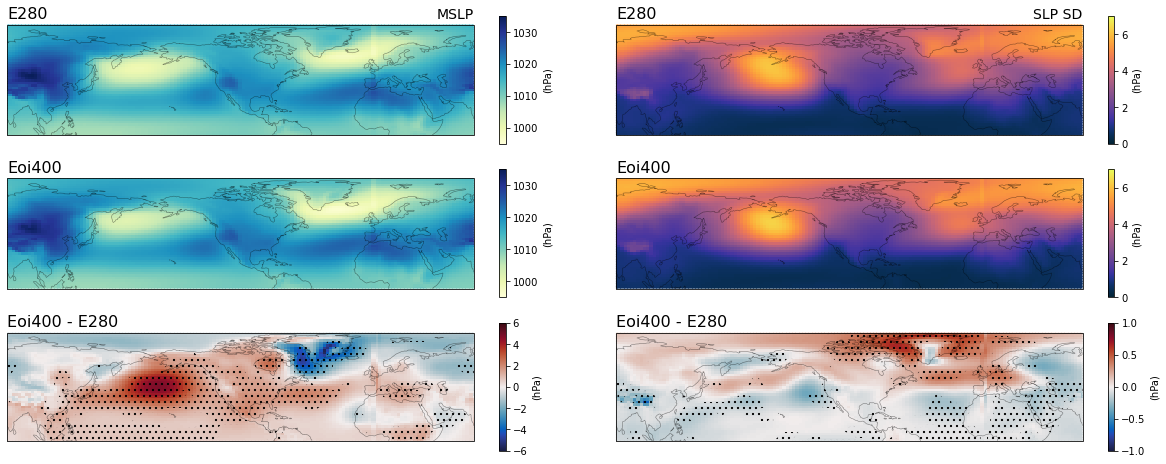

In [8]:
# e280_mslp    = janslp.sel(sim="E280").mslp.sel(lat = slice(0,85)).mean("model")
# eoi400_mslp  = janslp.sel(sim="Eoi400").mslp.sel(lat = slice(0,85)).mean("model")
# e280_slpsd   = janslp.sel(sim="E280").slpsd.sel(lat = slice(0,85)).mean("model")
# eoi400_slpsd = janslp.sel(sim="Eoi400").slpsd.sel(lat = slice(0,85)).mean("model")

e280_mslp    = djfslp.sel(sim="E280").mslp.sel(lat = slice(0,85)).mean("model")
eoi400_mslp  = djfslp.sel(sim="Eoi400").mslp.sel(lat = slice(0,85)).mean("model")
e280_slpsd   = djfslp.sel(sim="E280").slpsd.sel(lat = slice(0,85)).mean("model")
eoi400_slpsd = djfslp.sel(sim="Eoi400").slpsd.sel(lat = slice(0,85)).mean("model")

fig = plt.figure(figsize = (20,8), constrained_layout=False)
clon = -105;

# mslp

ax = fig.add_subplot(3,2,1, projection=ccrs.PlateCarree(central_longitude=clon))
e280_mslp.plot(ax=ax, transform = ccrs.PlateCarree(),  vmin=995, vmax=1035, cmap = 'YlGnBu', cbar_kwargs={'label':'(hPa)', 'fraction':0.03})
ax.coastlines(linewidth=.5, alpha=.5)
ax.set_title(''); ax.set_title(f'E280', fontsize = 16, loc='left'); ax.set_title(f'MSLP', fontsize = 14, loc='right');

ax = fig.add_subplot(3,2,3, projection=ccrs.PlateCarree(central_longitude=clon))
eoi400_mslp.plot(ax=ax, transform = ccrs.PlateCarree(),  vmin=995, vmax=1035, cmap = 'YlGnBu', cbar_kwargs={'label':'(hPa)', 'fraction':0.03})
ax.coastlines(linewidth=.5, alpha=.5)
ax.set_title(''); ax.set_title(f'Eoi400', fontsize = 16, loc='left'); 

ax = fig.add_subplot(3,2,5, projection=ccrs.PlateCarree(central_longitude=clon))
mslp_mean.plot(ax=ax, transform = ccrs.PlateCarree(),  vmin=-6, vmax=6, cmap = 'cmo.balance', cbar_kwargs={'label':'(hPa)', 'fraction':0.03})
mslp_agree.plot.contourf(ax=ax, transform = ccrs.PlateCarree(), levels = [0, 0.5], hatches = [None, '..'], colors='none', add_colorbar=False)
ax.coastlines(linewidth=.5, alpha=.5)
ax.set_title(''); ax.set_title(f'Eoi400 - E280', fontsize = 16, loc='left'); 

# slp sd

ax = fig.add_subplot(3,2,2, projection=ccrs.PlateCarree(central_longitude=clon))
e280_slpsd.plot(ax=ax, transform = ccrs.PlateCarree(),  vmin=0, vmax=7, cmap = 'cmo.thermal', cbar_kwargs={'label':'(hPa)', 'fraction':0.03})
ax.coastlines(linewidth=.5, alpha=.5)
ax.set_title(''); ax.set_title(f'E280', fontsize = 16, loc='left'); ax.set_title(f'SLP SD', fontsize = 14, loc='right');

ax = fig.add_subplot(3,2,4, projection=ccrs.PlateCarree(central_longitude=clon))
eoi400_slpsd.plot(ax=ax, transform = ccrs.PlateCarree(),  vmin=0, vmax=7, cmap = 'cmo.thermal', cbar_kwargs={'label':'(hPa)', 'fraction':0.03})
ax.coastlines(linewidth=.5, alpha=.5)
ax.set_title(''); ax.set_title(f'Eoi400', fontsize = 16, loc='left'); 

ax = fig.add_subplot(3,2,6, projection=ccrs.PlateCarree(central_longitude=clon))
slpsd_mean.plot(ax=ax, transform = ccrs.PlateCarree(),  vmin=-1, vmax=1, cmap = 'cmo.balance', cbar_kwargs={'label':'(hPa)', 'fraction':0.03})
slpsd_agree.plot.contourf(ax=ax, transform = ccrs.PlateCarree(), levels = [0, 0.5], hatches = [None, '..'], colors='none', add_colorbar=False)
ax.coastlines(linewidth=.5, alpha=.5)
ax.set_title(''); ax.set_title(f'Eoi400 - E280', fontsize = 16, loc='left'); 

# plt.savefig('figures/ensemblemean_SLPs.pdf', dpi=300)
# plt.savefig('figures/ensemblemean_SLPs.png', dpi=300)
# plt.savefig('figures/DJF_ensemblemean_SLPs.png', dpi=300)

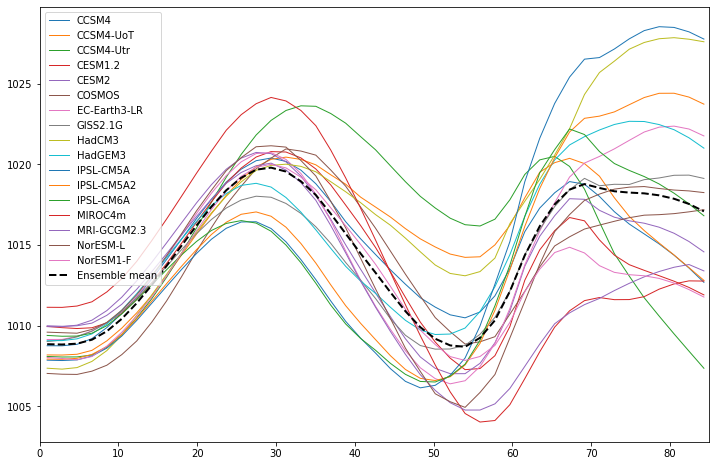

In [452]:
fig = plt.figure(figsize = (12,8), constrained_layout=False)
ax = fig.add_subplot(111)

# zm_slp = janslp.sel(sim="Eoi400").mslp.sel(lat = slice(0,85)).mean("lon")
zm_slp = janslp.sel(sim="Eoi400").mslp.sel(lat = slice(0,85)).sel(lon = slice(120,240)).mean("lon")

for i in range(len(modellist)):
    ax.plot(zm_slp.lat, zm_slp.isel(model=i), label=modellist[i], linewidth = 1)

ax.plot(zm_slp.lat, zm_slp.mean("model"), 'k--', linewidth = 2, label='Ensemble mean')
ax.set_xlim([0,85])
ax.legend()

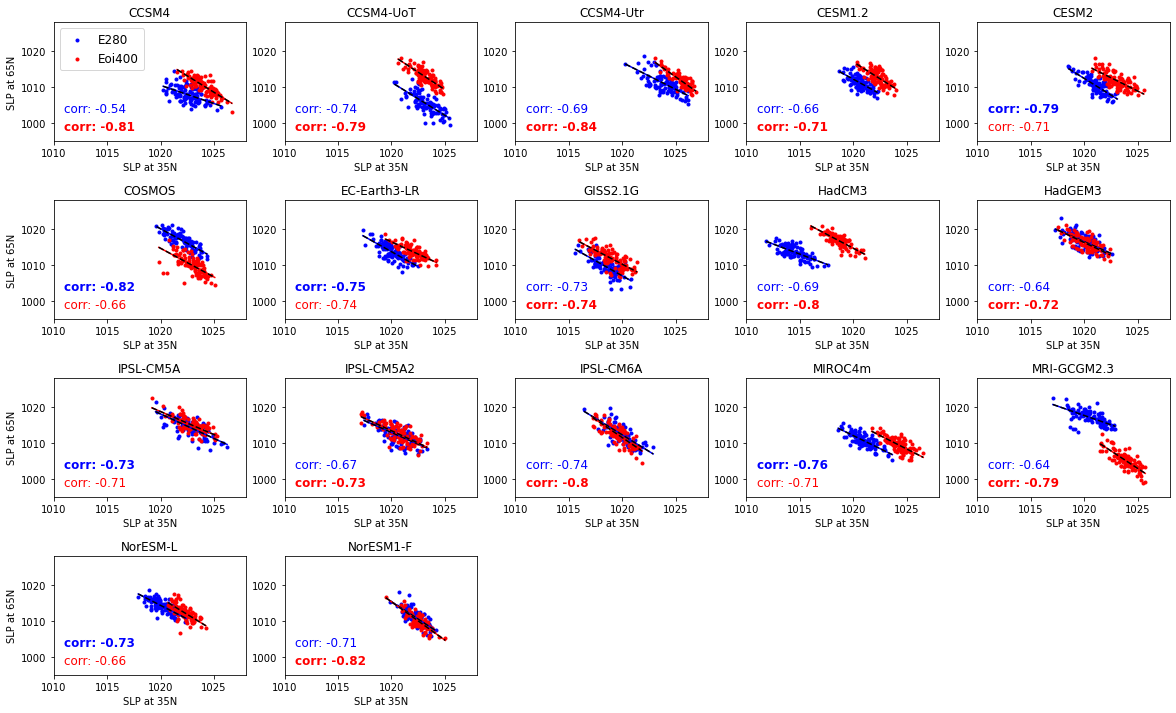

In [210]:
folder = 'PlioMIP2 data/'
sim1 = 'E280';   filename1 = 'E280_slp_DJF.nc';
sim2 = 'Eoi400'; filename2 = 'Eoi400_slp_DJF.nc';

lat_sth = np.array([30,35]);
lat_spl = np.array([60,65]);

fig = plt.figure(figsize = (20, 12), constrained_layout=False)

Pcorr1 = np.empty([len(modellist),1]); 
Pcorr2 = np.empty([len(modellist),1]); 

for i in range(len(modellist)):
    model = modellist[i]
    
    ds1 = xr.open_dataset(folder+model+'/'+sim1+'/'+filename1)
    p35_1 = ds1.slp.sel(lat=slice(lat_sth[0], lat_sth[1])).mean("lat").mean("lon")
    p65_1 = ds1.slp.sel(lat=slice(lat_spl[0], lat_spl[1])).mean("lat").mean("lon")
    
    ds2 = xr.open_dataset(folder+model+'/'+sim2+'/'+filename2)
    p35_2 = ds2.slp.sel(lat=slice(lat_sth[0], lat_sth[1])).mean("lat").mean("lon")
    p65_2 = ds2.slp.sel(lat=slice(lat_spl[0], lat_spl[1])).mean("lat").mean("lon")

    ax = fig.add_subplot(4,5  ,i+1)
    ax.scatter(p35_1, p65_1, color='b', marker='.', label=sim1)
    ax.scatter(p35_2, p65_2, color='r', marker='.', label=sim2)
    ax.set_ylim([995, 1028]); ax.set_xlim([1010, 1028])
    ax.set_title(model)
    ax.set_xlabel('SLP at 35N')
    
    if i==0:
        ax.legend(fontsize=12)
    if np.mod(i,5)==0:
        ax.set_ylabel('SLP at 65N')
        
    linmod = np.polyfit(p35_1, p65_1, 1); predict = np.poly1d(linmod); #y1 = predict(npacz1)
#     rsq = r2_score(latu1, y1)
    p35_1_pred = np.array([p35_1.min(), p35_1.max()]); p65_1_pred = predict(p35_1_pred);
    ax.plot(p35_1_pred, p65_1_pred, 'b-'); ax.plot(p35_1_pred, p65_1_pred, 'k--');
    
    linmod = np.polyfit(p35_2, p65_2, 1); predict = np.poly1d(linmod); #y1 = predict(npacz1)
#     rsq = r2_score(latu1, y1)
    p35_2_pred = np.array([p35_2.min(), p35_2.max()]); p65_2_pred = predict(p35_2_pred);
    ax.plot(p35_2_pred, p65_2_pred, 'r-'); ax.plot(p35_2_pred, p65_2_pred, 'k--')
    
    corr1 = np.corrcoef(p35_1, p65_1)[0,1]; corr2 = np.corrcoef(p35_2, p65_2)[0,1]; 
    if corr1<corr2: fw1 = 'bold'; fw2 = 'normal';
    else: fw1 = 'normal'; fw2 = 'bold'
    ax.text(1011, 1003, f'corr: {np.round(corr1,2)}', fontsize=12, fontweight = fw1, color='b')
    ax.text(1011, 998, f'corr: {np.round(corr2,2)}', fontsize=12, fontweight = fw2, color='r')
    Pcorr1[i] = corr1; 
    Pcorr2[i] = corr2;
    
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# plt.show()

# plt.savefig('figures/ensemble_35N_65N_SLPs.pdf', dpi=300)
# plt.savefig('figures/ensemble_35N_65N_SLPs.png', dpi=300)

In [12]:
a1 = xr.DataArray(data = Pcorr1[:], dims = ["model", "sim"], coords = dict(model=("model", modellist)))
a2 = xr.DataArray(data = Pcorr2[:], dims = ["model", "sim"], coords = dict(model=("model", modellist)))
SLPcorrs = xr.concat([a1, a2], dim="sim").assign_coords({"sim": ("sim", ['E280', 'Eoi400'])})


In [17]:
folder = 'PlioMIP2 data/'
sim1 = 'E280';   filename1 = 'E280_slp_DJF.nc';
sim2 = 'Eoi400'; filename2 = 'Eoi400_slp_DJF.nc';

lat_sth = np.array([30,35]);
lat_spl = np.array([60,65]);

# .sel(lon=slice(120,240))
# .sel(lon=slice(300,360))

for i in range(len(modellist)):
    model = modellist[i]
    
    ds1 = xr.open_dataset(folder+model+'/'+sim1+'/'+filename1)
    p35_1 = ds1.slp.sel(lat=slice(lat_sth[0], lat_sth[1])).mean("lat").mean("lon")
    p65_1 = ds1.slp.sel(lat=slice(lat_spl[0], lat_spl[1])).mean("lat").mean("lon")
    
    ds2 = xr.open_dataset(folder+model+'/'+sim2+'/'+filename2)
    p35_2 = ds2.slp.sel(lat=slice(lat_sth[0], lat_sth[1])).mean("lat").mean("lon")
    p65_2 = ds2.slp.sel(lat=slice(lat_spl[0], lat_spl[1])).mean("lat").mean("lon")
    
    if i==0:
        nam1 = p35_1 - p65_1
        nam2 = p35_2 - p65_2
    else:
        nam1 = xr.concat([nam1, p35_1 - p65_1], dim='model')
        nam2 = xr.concat([nam2, p35_2 - p65_2], dim='model')

        
nam1 = nam1/nam1.mean("time") - 1; nam2 = nam2/nam2.mean("time") - 1;

nam1 = nam1.assign_coords({"model": ("model", modellist)})
nam2 = nam2.assign_coords({"model": ("model", modellist)})


Text(0, 0.5, 'Eoi400 NAM index SD (-)')

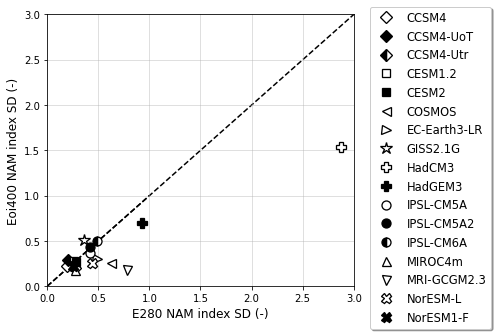

In [11]:
fig = plt.figure(figsize = (7.5,5), constrained_layout=False)

widths = [1, 0.3]; heights = [1];
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights, wspace=0.1, hspace=0.1)

ax = fig.add_subplot(spec[0,0])

x = nam1.std("time"); y = nam2.std("time");

markers = ['D', 'D', 'D', 's', 's', '<', '>', '*', 'P', 'P', 'o', 'o', 'o', '^', 'v', 'X', 'X']
msize   = [8,    8,   8,   8,   8,   9,   9,  13,  10,   10,   9,   9,   9,   9,   9,  10,  10]
colors  = ['w', 'k', 'w', 'w', 'k', 'w', 'w', 'w', 'w', 'k', 'w', 'k', 'w', 'w', 'w', 'w', 'k']
fillstyles = ['full', 'full', 'right', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 
              'full', 'right', 'full', 'full', 'full', 'full']

for i in range(len(modellist)):
    ax.plot(x[i], y[i], label = modellist[i], marker = markers[i], markersize = msize[i], color=colors[i], linestyle='None', 
            markeredgecolor ='k', fillstyle = fillstyles[i], markerfacecoloralt = 'k', markeredgewidth=1.3)
    
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 1.05), shadow=True, ncol=1, fontsize=11.5)
ax.grid(alpha=0.5)

ax.set_xlim([0,3]); ax.set_ylim([0,3]);
ax.plot([0,3], [0,3], 'k--', zorder=-1)
ax.plot([0,1], [0,1], 'k--', zorder=-1)

ax.set_xlabel('E280 NAM index SD (-)', fontsize=12)
ax.set_ylabel('Eoi400 NAM index SD (-)', fontsize=12)

# plt.savefig('figures/NAM_index_SD.pdf', dpi=200)
# plt.savefig('figures/NAM_index_SD.png', dpi=200)

In [300]:
nam_change1 = 100*(nam2.std("time") - nam1.std("time"))/nam1.std("time")
nam_change2 = nam2.std("time") - nam1.std("time")



In [9]:
from defs import compute_SLP_eofs, varfs

In [10]:
## Gridweights for 

def compute_gridweights(ds):

    dlat = ds.lat[1] - ds.lat[0]
    gw = np.zeros((len(ds.lat), len(ds.lon)))

    for i in range(len(ds.lat)):
        lat1 = ds.lat[i] + dlat
        lat2 = ds.lat[i] - dlat

        if ds.lat[i] == 90: lat1 = 90;
        elif ds.lat[i] == -90:lat2 = -90; 

        gw[i,:] = np.abs(np.sin((lat1)*2*np.pi/360) - (np.sin((lat2)*2*np.pi/360)))

    gridweights = xr.DataArray(gw, [("lat", ds.lat.values), ("lon", ds.lon.values)])
    
    return gridweights

In [21]:
i = 14

folder = 'PlioMIP2 data/';
sim1 = 'E280'; filename1 = 'E280_slp_DJF.nc';
model = modellist[i]
print(model)
ds1 = xr.open_dataset(folder+model+'/'+sim1+'/'+filename1)
                     
slp_ = ds1.slp
gw_ = compute_gridweights(ds1)

eofs1, _ = compute_SLP_eofs(slp_, gw_, nmodes=2, lats = [20, 85], sector = 'NH', sim = 'PI', lowess_filter = False)


MRI-GCGM2.3


0.30502638


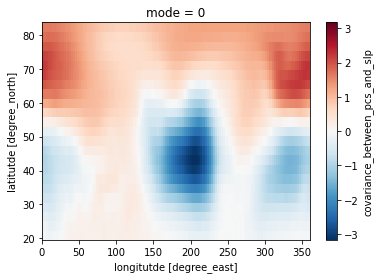

In [22]:
eofs1.isel(mode=0).eofs.plot()
print(eofs1.isel(mode=0).variance_fractions.values)

In [776]:
np.ones([2,3])

array([[1., 1., 1.],
       [1., 1., 1.]])

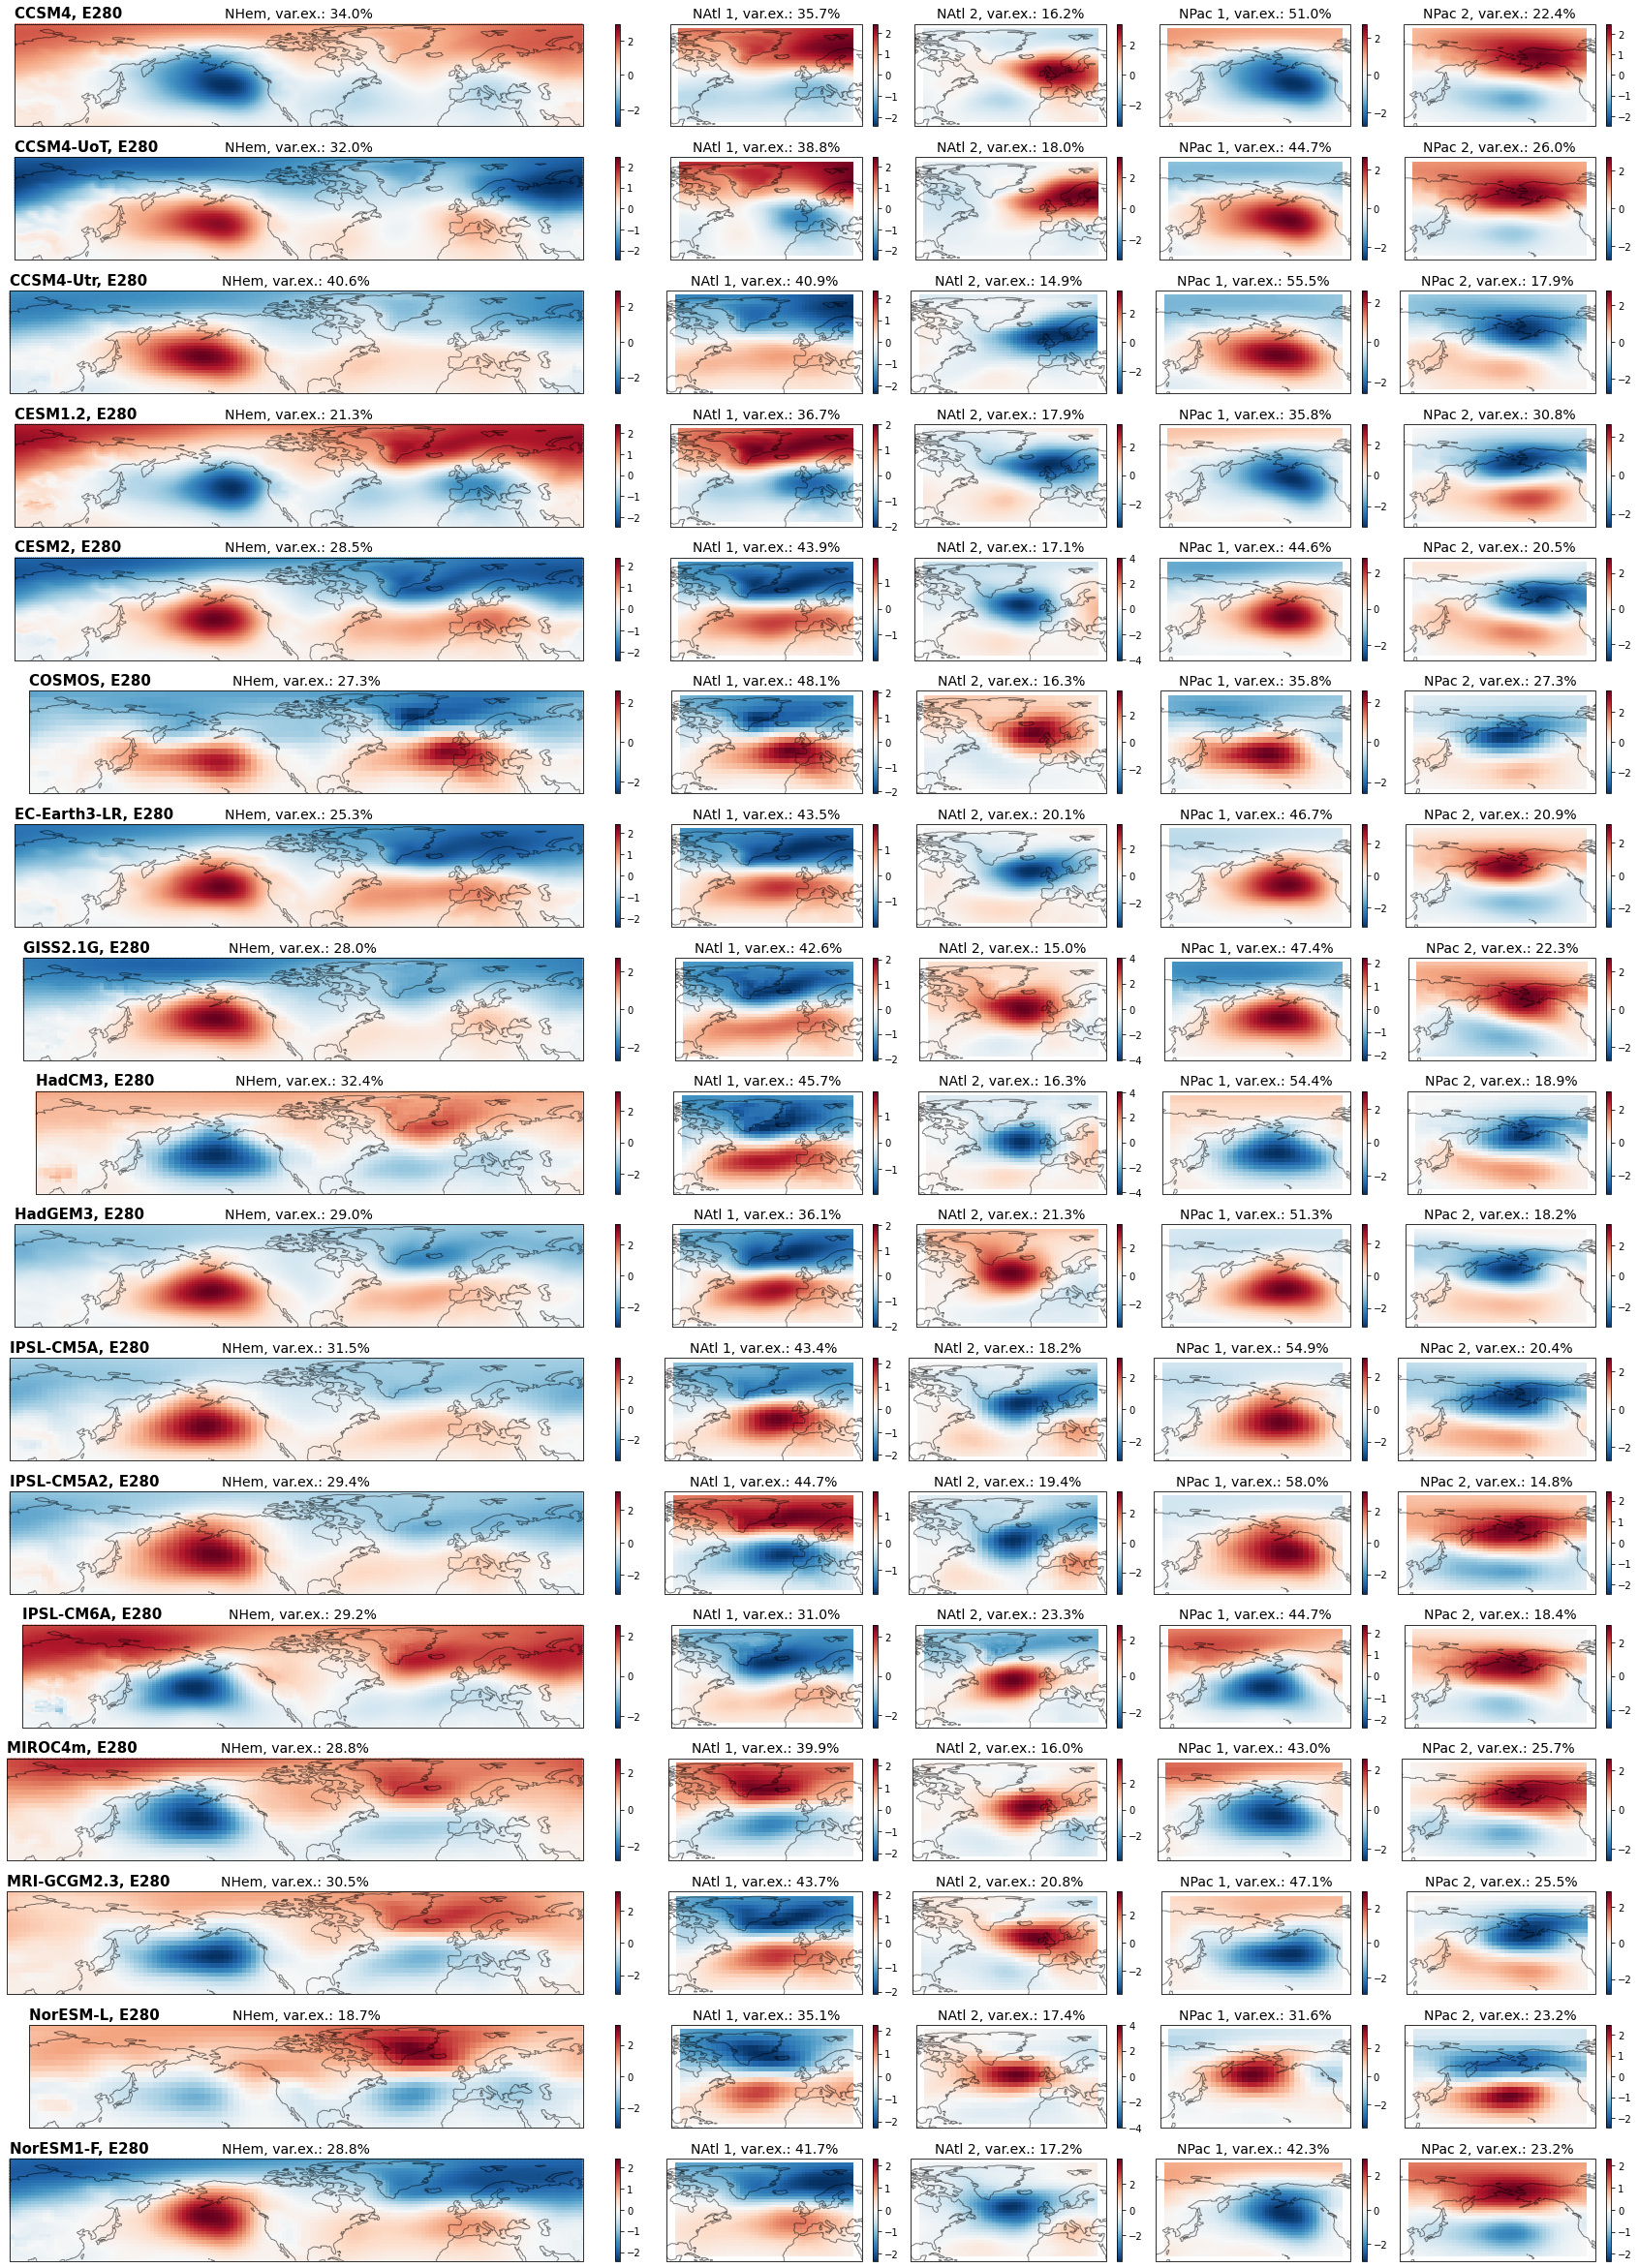

In [289]:

fig = plt.figure(figsize=(30, 2.5*len(modellist)))
widths = np.array([3, 1,1,1,1]); heights = np.ones(len(modellist));
gs = fig.add_gridspec(ncols=5, nrows=len(modellist), width_ratios=widths, height_ratios=heights, wspace=0.1, hspace=0.3)

clon=-105;

folder = 'PlioMIP2 data/';
sim1 = 'E280'; filename1 = 'E280_slp_DJF.nc';
# sim1 = 'Eoi400'; filename1 = 'Eoi400_slp_january.nc';

varexp = np.empty([len(modellist), 5])

for i in range(len(modellist)):

    model = modellist[i]
    ds1 = xr.open_dataset(folder+model+'/'+sim1+'/'+filename1)

    slp_ = ds1.slp; gw_ = compute_gridweights(ds1);

    eofs1, _ = compute_SLP_eofs(slp_, gw_, nmodes=2, lats = [20, 85], sector = 'NH', sim = 'PI', lowess_filter = False)

    ax = fig.add_subplot(gs[i,0], projection=ccrs.PlateCarree(central_longitude=clon))
    eofs1.eofs.isel(mode=0).plot(ax=ax, transform = ccrs.PlateCarree(), cbar_kwargs={'label':'', 'fraction':0.03})
    ax.coastlines(alpha=0.5)
    ax.set_title(f'NHem, var.ex.: {varfs(eofs1.isel(mode=0))}%', fontsize=14); varexp[i,0] = varfs(eofs1.isel(mode=0));
    ax.set_title(f'{model}, {sim1}', fontsize = 15, fontweight='bold', loc='left')

    eofs1, _ = compute_SLP_eofs(slp_, gw_, nmodes=2, lats = [20, 85], sector = 'NA', sim = 'PI', lowess_filter = False)

    ax = fig.add_subplot(gs[i,1], projection=ccrs.PlateCarree(central_longitude=clon))
    eofs1.eofs.isel(mode=0).plot(ax=ax, transform = ccrs.PlateCarree(), cbar_kwargs={'label':'', 'fraction':0.03})
    ax.coastlines(alpha=0.5)
    ax.set_title(f'NAtl 1, var.ex.: {varfs(eofs1.isel(mode=0))}%', fontsize=14); varexp[i,1] = varfs(eofs1.isel(mode=0));
    
    ax = fig.add_subplot(gs[i,2], projection=ccrs.PlateCarree(central_longitude=clon))
    eofs1.eofs.isel(mode=1).plot(ax=ax, transform = ccrs.PlateCarree(), cbar_kwargs={'label':'', 'fraction':0.03})
    ax.coastlines(alpha=0.5)
    ax.set_title(f'NAtl 2, var.ex.: {varfs(eofs1.isel(mode=1))}%', fontsize=14); varexp[i,2] = varfs(eofs1.isel(mode=1));

    eofs1, _ = compute_SLP_eofs(slp_, gw_, nmodes=2, lats = [20, 85], sector = 'NP', sim = 'PI', lowess_filter = False)

    ax = fig.add_subplot(gs[i,3], projection=ccrs.PlateCarree(central_longitude=clon))
    eofs1.eofs.isel(mode=0).plot(ax=ax, transform = ccrs.PlateCarree(), cbar_kwargs={'label':'', 'fraction':0.03})
    ax.coastlines(alpha=0.5)
    ax.set_title(f'NPac 1, var.ex.: {varfs(eofs1.isel(mode=0))}%', fontsize=14); varexp[i,3] = varfs(eofs1.isel(mode=0));

    ax = fig.add_subplot(gs[i,4], projection=ccrs.PlateCarree(central_longitude=clon))
    eofs1.eofs.isel(mode=1).plot(ax=ax, transform = ccrs.PlateCarree(), cbar_kwargs={'label':'', 'fraction':0.03})
    ax.coastlines(alpha=0.5)
    ax.set_title(f'NPac 2, var.ex.: {varfs(eofs1.isel(mode=1))}%', fontsize=14); varexp[i,4] = varfs(eofs1.isel(mode=1));

VE_e280 = varexp
# VE_eoi400 = varexp

# plt.savefig('figures/ensemble_E280_DJF_SLP_EOFs.png')
# plt.savefig('figures/ensemble_Eoi400_DJF_SLP_EOFs.png')

In [290]:
modes = ['NHem', 'NAtl1', 'NAtl2', 'NPac1', 'NPac2']
a1 = xr.DataArray(data = VE_e280, dims = ["model", "mode"], coords = dict(model=("model", modellist), mode=("mode", modes)))
a2 = xr.DataArray(data = VE_eoi400, dims = ["model", "mode"], coords = dict(model=("model", modellist), mode=("mode", modes)))

varexps = xr.concat([a1, a2], dim="sim").assign_coords({"sim": ("sim", ['E280', 'Eoi400'])})

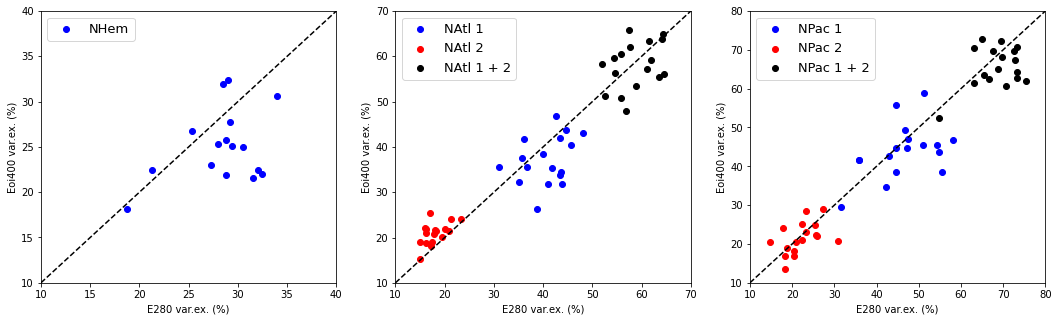

In [291]:
x = varexps.sel(sim="E280"); y = varexps.sel(sim="Eoi400");

fig = plt.figure(figsize=(18,5))

ax = fig.add_subplot(131)

ax.scatter(x.isel(mode=0), y.isel(mode=0), color='b', label='NHem')
ax.legend(fontsize=13)
ax.set_xlim([10, 40]); ax.set_ylim([10, 40]); ax.plot([10, 40], [10, 40], 'k--')
ax.set_xlabel('E280 var.ex. (%)');ax.set_ylabel('Eoi400 var.ex. (%)');

ax = fig.add_subplot(132)

ax.scatter(x.isel(mode=1), y.isel(mode=1), color='b', label='NAtl 1')
ax.scatter(x.isel(mode=2), y.isel(mode=2), color='r', label='NAtl 2')
ax.scatter(x.isel(mode=1)+x.isel(mode=2), y.isel(mode=1)+y.isel(mode=2), color='k', label = 'NAtl 1 + 2')
ax.legend(fontsize=13)
ax.set_xlim([10, 70]); ax.set_ylim([10, 70]); ax.plot([10, 70], [10, 70], 'k--')
ax.set_xlabel('E280 var.ex. (%)');ax.set_ylabel('Eoi400 var.ex. (%)');

ax = fig.add_subplot(133)

ax.scatter(x.isel(mode=3), y.isel(mode=3), color='b', label='NPac 1')
ax.scatter(x.isel(mode=4), y.isel(mode=4), color='r', label='NPac 2')
ax.scatter(x.isel(mode=3)+x.isel(mode=4), y.isel(mode=3)+y.isel(mode=4), color='k', label = 'NPac 1 + 2')
ax.legend(fontsize=13)
ax.set_xlim([10, 80]); ax.set_ylim([10, 80]); ax.plot([10, 80], [10, 80], 'k--')
ax.set_xlabel('E280 var.ex. (%)');ax.set_ylabel('Eoi400 var.ex. (%)');

# plt.savefig('figures/DJF_Eoi400_E280_VarExp.png')

In [306]:
ao_change_ = (varexps.sel(sim="Eoi400").isel(mode=0) - varexps.sel(sim="E280").isel(mode=0))


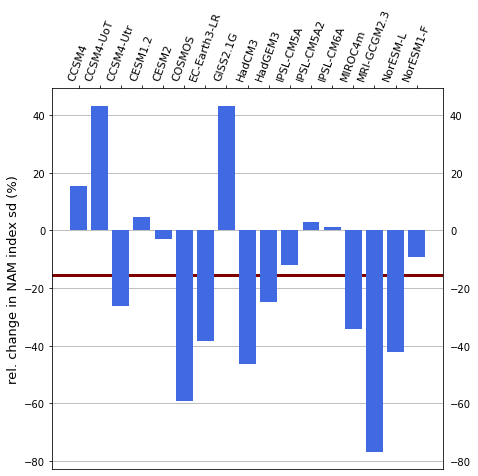

In [310]:
## percentual change in Nino34 standard deviation (ie 'amplitude')
# perc = (varexps.sel(sim="Eoi400").isel(mode=0) - varexps.sel(sim="E280").isel(mode=0))
perc = nam_change1
mean_perc = np.mean(perc)
# mean_perc = 100 * (np.mean(std_eoi400) - np.mean(std_e280)) / np.mean(std_e280);

perc_bins = [-70, -60, -50, -40, -30, -20, -10,   0,  10]
hist, bin_edges = np.histogram(perc, bins = perc_bins)

fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(7,7))
for i in range(len(modellist)):
        ax.bar(modellist[i], perc[i], hatch='', color = 'royalblue')
h = plt.axhline(y = mean_perc, color = 'maroon', zorder = -1, alpha=1., linewidth=3)

ax.xaxis.tick_top(); #ax.set_ylim([-17,5])
ax.tick_params(axis='x', rotation=70, labelsize=11);
ax.tick_params(axis='y', labelright=True)
ax.yaxis.grid(zorder=0); ax.set_axisbelow(True)
ax.set_ylabel('rel. change in NAM index sd (%)', size=13);
# ax.legend([h], ['Ensemble mean = '+str(round(mean_perc,1))+'%'], fontsize=13);

# for i in range(len(perc_bins)-1):
#     ax.axhspan(perc_bins[i], perc_bins[i+1], facecolor = 'k', alpha = 0.1*hist[i], zorder = -1)
#     ax.text(-0.9,perc_bins[i]+1, str(hist[i]), fontsize=15)
    
# plt.savefig('Nino34StdDevChange_v4.png', bbox_inches='tight', dpi=100)
plt.savefig('figures/NAMindex_change_bargraph.pdf', bbox_inches='tight')

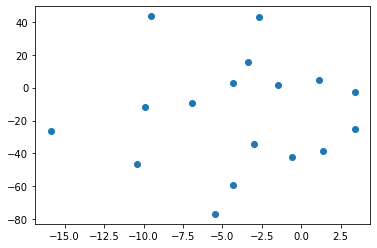

In [307]:
plt.scatter(ao_change_, nam_change1)

In [108]:
z1 = 100*((y.isel(mode=0) - x.isel(mode=0)) / (x.isel(mode=0)))
z2 = (y.isel(mode=0) - x.isel(mode=0))



# for i in range(len(modellist)):
#     print(f'{modellist[i]} : {z[i].values}')

## check JJA SLP data

In [69]:
i = 16

folder = 'PlioMIP2 data/'
model = modellist[i]

sim1 = 'E280'; filename1 = 'E280_slp_JJA.nc'; 
sim2 = 'Eoi400'; filename2 = 'Eoi400_slp_JJA.nc'; 


ds = xr.open_dataset(folder+model+'/'+sim1+'/'+filename1)
a=ds.slp.sel(lat = slice(-85,-20))
a=a.mean("time")

ds = xr.open_dataset(folder+model+'/'+sim2+'/'+filename2)
b=ds.slp.sel(lat = slice(-85,-20))
b=b.mean("time")

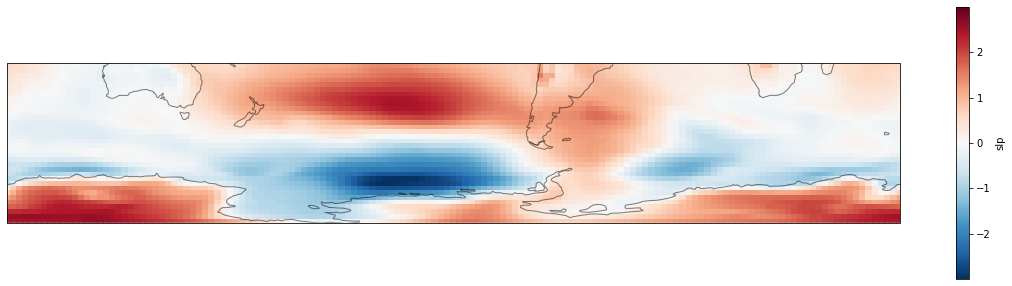

In [70]:

clon=-105
fig=plt.figure(figsize=(20,5))
ax= fig.add_subplot(1,1,1, projection=ccrs.PlateCarree(central_longitude=clon))

(b-a).plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(alpha=0.5)

# Check January SLP data

Text(0.0, 1.0, 'sim = Eoi400 - E280')

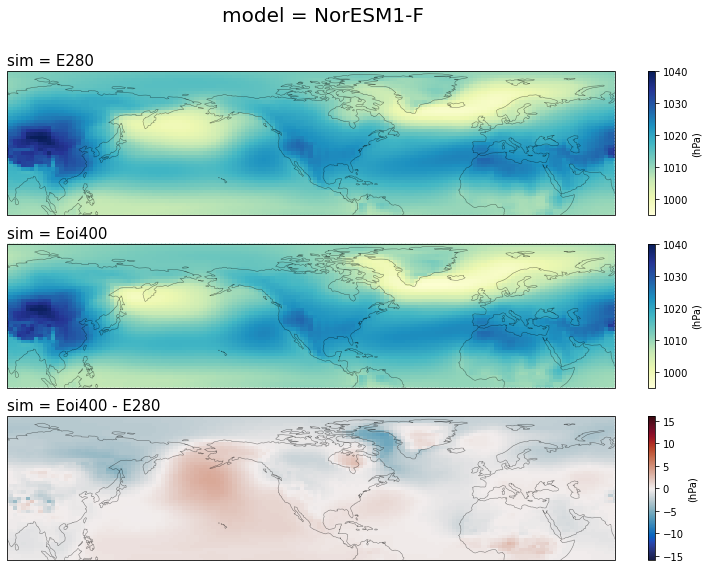

In [434]:
i = 16

folder = 'PlioMIP2 data/'
model = modellist[i]

sim1 = 'E280'
filename = 'E280_slp_january.nc'
ds = xr.open_dataset(folder+model+'/'+sim1+'/'+filename).sortby("lat")
mslp1 = ds.slp.sel(lat=slice(0,85)).mean("time")

sim2 = 'Eoi400'
filename = 'Eoi400_slp_january.nc'
ds = xr.open_dataset(folder+model+'/'+sim2+'/'+filename).sortby("lat")
mslp2 = ds.slp.sel(lat=slice(0,85)).mean("time")

fig = plt.figure(figsize = (12,9), constrained_layout=False)

clon = -105;
    
ax = fig.add_subplot(3,1,1, projection=ccrs.PlateCarree(central_longitude=clon))
mslp1.plot(ax=ax, transform = ccrs.PlateCarree(),  vmin=995, vmax=1040, cmap = 'YlGnBu', cbar_kwargs={'label':'(hPa)', 'fraction':0.03})
ax.coastlines(linewidth=.5, alpha=.5)
ax.set_title(f'sim = {sim1}', fontsize = 15, loc='left')

# ax.set_title(''); ax.set_title('Eoi400 (colors) and diff. with E280 (lines)', fontsize = 15, fontweight = 'bold', loc='left'); 
# ax.set_title('MSLP', fontsize = 14, loc='right')
# lat_ticks(ax,'NH'); lon_ticks(ax, 'top'); 

ax = fig.add_subplot(3,1,2, projection=ccrs.PlateCarree(central_longitude=clon))
mslp2.plot(ax=ax, transform = ccrs.PlateCarree(),  vmin=995, vmax=1040, cmap = 'YlGnBu', cbar_kwargs={'label':'(hPa)', 'fraction':0.03})
ax.coastlines(linewidth=.5, alpha=.5)
ax.set_title(f'sim = {sim2}', fontsize = 15, loc='left')

# ax.set_title(''); 
# ax.set_title('SLP SD', fontsize = 14, loc='right')
# lat_ticks(ax,'NH'); lon_ticks(ax,'bottom');

ax = fig.add_subplot(3,1,3, projection=ccrs.PlateCarree(central_longitude=clon))
(mslp2-mslp1).plot(ax=ax, transform = ccrs.PlateCarree(),  vmin=-16, vmax=16, cmap = 'cmo.balance', cbar_kwargs={'label':'(hPa)', 'fraction':0.03})
ax.coastlines(linewidth=.5, alpha=.5)

plt.suptitle(f'model = {model}', fontsize = 20)
ax.set_title(f'sim = {sim2} - {sim1}', fontsize = 15, loc='left')

# plt.savefig('200years/figures/FIGURE2_raw.png',dpi=300)

Text(0.0, 1.0, 'sim = Eoi400 - E280')

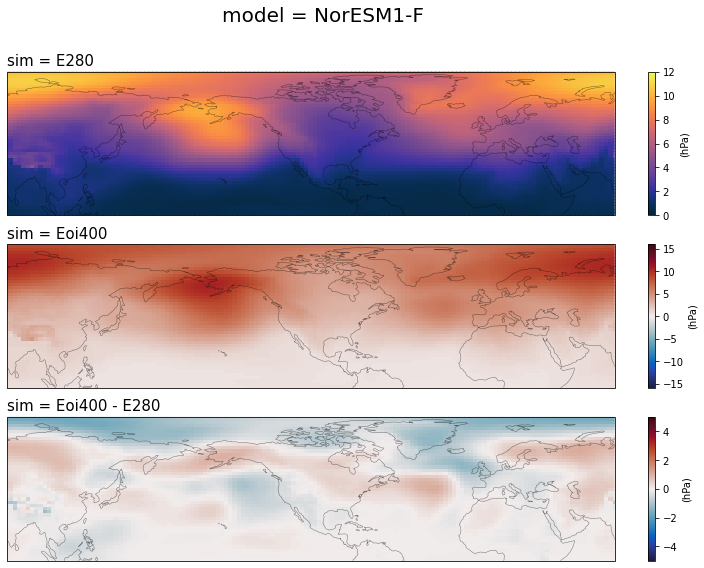

In [454]:
i = 1

folder = 'PlioMIP2 data/'
model = modellist[i]

sim1 = 'E280'
filename = 'E280_slp_january.nc'
ds = xr.open_dataset(folder+model+'/'+sim1+'/'+filename).sortby("lat")
mslp1 = ds.slp.sel(lat=slice(0,85)).std("time")

sim2 = 'Eoi400'
filename = 'Eoi400_slp_january.nc'
ds = xr.open_dataset(folder+model+'/'+sim2+'/'+filename).sortby("lat")
mslp2 = ds.slp.sel(lat=slice(0,85)).std("time")

fig = plt.figure(figsize = (12,9), constrained_layout=False)

clon = -105;
    
ax = fig.add_subplot(3,1,1, projection=ccrs.PlateCarree(central_longitude=clon))
mslp1.plot(ax=ax, transform = ccrs.PlateCarree(), vmin=0, vmax=12, cmap  = 'cmo.thermal', cbar_kwargs={'label':'(hPa)', 'fraction':0.03})
ax.coastlines(linewidth=.5, alpha=.5)
ax.set_title(f'sim = {sim1}', fontsize = 15, loc='left')

# ax.set_title(''); ax.set_title('Eoi400 (colors) and diff. with E280 (lines)', fontsize = 15, fontweight = 'bold', loc='left'); 
# ax.set_title('MSLP', fontsize = 14, loc='right')
# lat_ticks(ax,'NH'); lon_ticks(ax, 'top'); 

ax = fig.add_subplot(3,1,2, projection=ccrs.PlateCarree(central_longitude=clon))
mslp2.plot(ax=ax, transform = ccrs.PlateCarree(), vmin=0, vmax=12, cmap  = 'cmo.thermal', cbar_kwargs={'label':'(hPa)', 'fraction':0.03})
ax.coastlines(linewidth=.5, alpha=.5)
ax.set_title(f'sim = {sim2}', fontsize = 15, loc='left')

# ax.set_title(''); 
# ax.set_title('SLP SD', fontsize = 14, loc='right')
# lat_ticks(ax,'NH'); lon_ticks(ax,'bottom');

ax = fig.add_subplot(3,1,3, projection=ccrs.PlateCarree(central_longitude=clon))
(mslp2-mslp1).plot(ax=ax, transform = ccrs.PlateCarree(), vmin=-5, vmax=5, cmap = 'cmo.balance', cbar_kwargs={'label':'(hPa)', 'fraction':0.03})
ax.coastlines(linewidth=.5, alpha=.5)

plt.suptitle(f'model = {model}', fontsize = 20)
ax.set_title(f'sim = {sim2} - {sim1}', fontsize = 15, loc='left')

# plt.savefig('200years/figures/FIGURE2_raw.png',dpi=300)

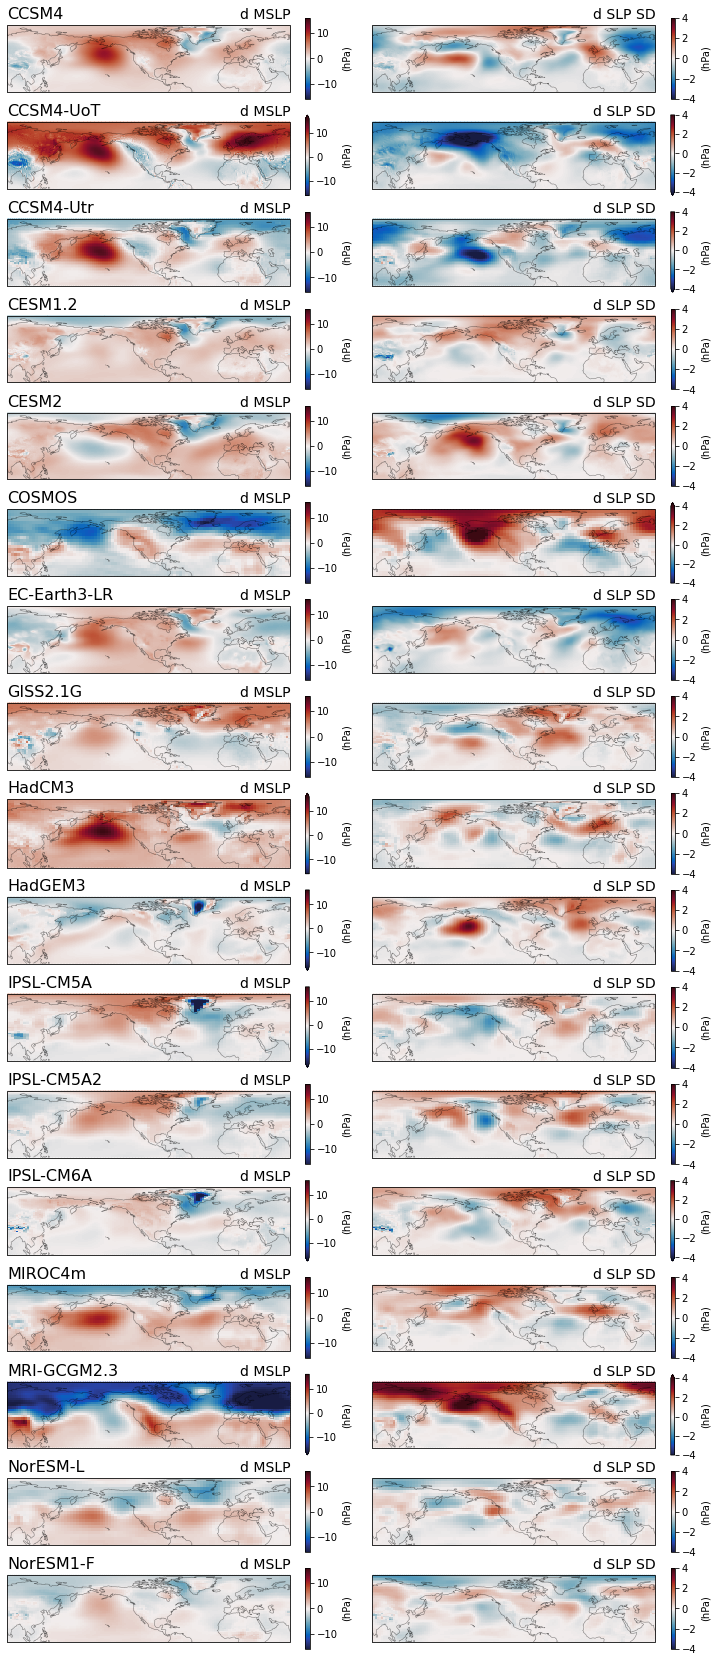

In [460]:
folder = 'PlioMIP2 data/'
sim1 = 'E280';   filename1 = 'E280_slp_january.nc';
sim2 = 'Eoi400'; filename2 = 'Eoi400_slp_january.nc';
N = len(modellist)

fig = plt.figure(figsize = (12,30), constrained_layout=False)

for i in range(N):
    model = modellist[i]

    ds1 = xr.open_dataset(folder+model+'/'+sim1+'/'+filename1)
    mslp1  = ds1.slp.sel(lat=slice(0,85)).mean("time")
    sdslp1 = ds1.slp.sel(lat=slice(0,85)).std("time")

    ds2 = xr.open_dataset(folder+model+'/'+sim2+'/'+filename2)
    mslp2  = ds2.slp.sel(lat=slice(0,85)).mean("time")
    sdslp2 = ds2.slp.sel(lat=slice(0,85)).std("time")

    mdiff = mslp2 - mslp1
    sddiff = sdslp2 - sdslp1

    ax = fig.add_subplot(N,2,2*i+1, projection=ccrs.PlateCarree(central_longitude=clon))
    mdiff.plot(ax=ax, transform = ccrs.PlateCarree(), vmin=-16, vmax=16, cmap = 'cmo.balance', cbar_kwargs={'label':'(hPa)', 'fraction':0.02})
    ax.coastlines(linewidth=.5, alpha=.5)
    ax.set_title(f'{model}', fontsize = 16, loc='left')
    ax.set_title(f'd MSLP', fontsize = 14, loc='right')

    ax = fig.add_subplot(N,2,2*i+2, projection=ccrs.PlateCarree(central_longitude=clon))
    sddiff.plot(ax=ax, transform = ccrs.PlateCarree(), vmin=-4, vmax=4, cmap = 'cmo.balance', cbar_kwargs={'label':'(hPa)', 'fraction':0.02})
    ax.coastlines(linewidth=.5, alpha=.5)
    ax.set_title(f'd SLP SD', fontsize = 14, loc='right')

# plt.savefig('figures/Eoi400minE280_SLPs.png')
# plt.savefig('figures/Eoi400minE280_SLPs.pdf')

In [75]:
folder = 'PlioMIP2 data/'
sim1 = 'E280';   filename1 = 'E280_slp_january.nc';
sim2 = 'Eoi400'; filename2 = 'Eoi400_slp_january.nc';
N = len(modellist)

mdiff_NP = np.empty(len(modellist))
sddiff_NP = np.empty(len(modellist))

fig = plt.figure(figsize = (12,30), constrained_layout=False)

for i in range(N):
    model = modellist[i]

    ds1 = xr.open_dataset(folder+model+'/'+sim1+'/'+filename1)
    mslp1  = ds1.slp.sel(lat=slice(0,85)).mean("time")
    sdslp1 = ds1.slp.sel(lat=slice(0,85)).std("time")

    ds2 = xr.open_dataset(folder+model+'/'+sim2+'/'+filename2)
    mslp2  = ds2.slp.sel(lat=slice(0,85)).mean("time")
    sdslp2 = ds2.slp.sel(lat=slice(0,85)).std("time")

    mdiff = mslp2 - mslp1
    sddiff = sdslp2 - sdslp1
    
    mdiff_NP[i] = mdiff.sel(lon=slice(140, 220)).sel(lat=slice(20,75)).mean()
    sddiff_NP[i] = sddiff.sel(lon=slice(140, 220)).sel(lat=slice(20,75)).mean()
    

# plt.savefig('figures/Eoi400minE280_SLPs.png')
# plt.savefig('figures/Eoi400minE280_SLPs.pdf')

<Figure size 864x2160 with 0 Axes>

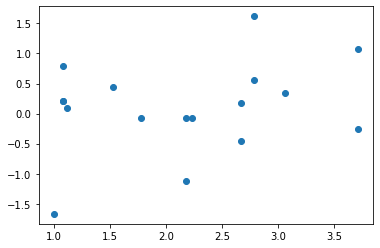

In [253]:
plt.scatter(horres, sddiff_NP)

## some correlations

In [81]:
print(modellist)

['CCSM4', 'CCSM4-UoT', 'CCSM4-Utr', 'CESM1.2', 'CESM2', 'COSMOS', 'EC-Earth3-LR', 'GISS2.1G', 'HadCM3', 'HadGEM3', 'IPSL-CM5A', 'IPSL-CM5A2', 'IPSL-CM6A', 'MIROC4m', 'MRI-GCGM2.3', 'NorESM-L', 'NorESM1-F']


In [238]:
# relative difference in ENSO index SD Eoi400 - E280 (%)
# Oldeman et al 2021
d_enso = np.array([-43, -29, -66, -29, -9, -2, -41, 2, -38, -20, -16, -21, -7, -25, +3, -38, -21])

# absolute difference in AMOC strength Eoi400 - E280 (Sv)
# Weiffenbach et al 2023
d_amoc = np.array([2.7, 0.8, 3, -0.5, 4, 3.5, 3.3, 8, 5.3, -2, 4.7, 5.8, 3.8, 0.6, np.nan, np.nan, 3.8])

# absolute difference in annual Arctic SAT Eoi400 - E280 (deg C)
# de Nooijer et al 2020
d_asat = np.array([7, 10, 10, 9, 10, 7, 11, 3, 5, np.nan, 5, 5, 7, 7, 7, 5, 5])

# relative difference in January Arctic SIE Eoi400 - E280 (%)
# de Nooijer et al 2020
d_sie = np.array([-34, -50, -57, -55, -76, -43, -57, -39, -38, np.nan, -32, -31, -38, -35, -21, -15, -23])

## relative difference in North Pacific Meridional Mode (NPMM) index (SST anomaly based, %) 
# Pontes et al 2022
d_npmm = np.array([np.nan, 0, -28, np.nan, 26, 38, 7, 7, 26, np.nan, 0, 2, 19, -12, 7, -3, -14])

# relative and absolute difference in DJF NAM index (based on 35N 65N SLP) (%)
d_namr = nam_change1
d_nama = nam_change2

# relative and absolute difference in AO variance explained (%)
d_aovarr = z1
d_aovara = z2



NameError: name 'z1' is not defined

In [78]:
# varlist = [d_enso, d_amoc, d_asat, d_sie, d_namr.values, d_aovara.values]
# varnames = ['d_ENSO', 'd_AMOc', 'd_arcSAT', 'd_arcSIE', 'd_NAM', 'd_AOVarExp']
varunits = ['%', 'Sv', 'deg C', '%', '%', '%']
corlist1 = [0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4]
corlist2 = [1, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 5, 4, 5, 5]

markers = ['D', 'D', 'D', 's', 's', '<', '>', '*', 'P', 'P', 'o', 'o', 'o', '^', 'v', 'X', 'X']
msize   = [8,    8,   8,   8,   8,   9,   9,  13,  10,   10,   9,   9,   9,   9,   9,  10,  10]
colors  = ['w', 'k', 'w', 'w', 'k', 'w', 'w', 'w', 'w', 'k', 'w', 'k', 'w', 'w', 'w', 'w', 'k']
fillstyles = ['full', 'full', 'right', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 
              'full', 'right', 'full', 'full', 'full', 'full']

# mecolor = ['k', 'r', 'r', 'k', 'k', 'b', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'b', 'k', 'k']
mecolor = ['k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k']

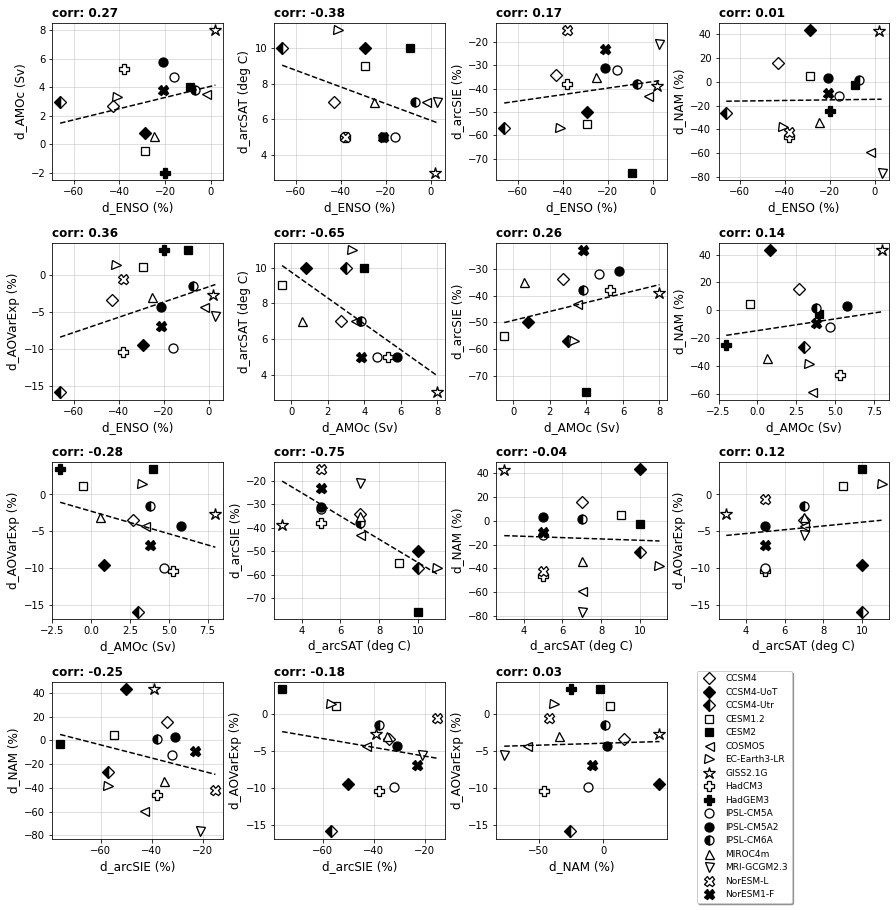

In [339]:
fig = plt.figure(figsize = (15,15), constrained_layout=False)

for i in range(len(corlist1)):
    
    ax = fig.add_subplot(4,4  ,i+1)
    
    var1 = varlist[corlist1[i]]; var2 = varlist[corlist2[i]];
    
#     ax.scatter(var1, var2)
    for j in range(len(modellist)):
        ax.plot(var1[j], var2[j], label = modellist[j], marker = markers[j], markersize = msize[j], color=colors[j], 
                linestyle='None', markeredgecolor = mecolor[j], fillstyle = fillstyles[j], markerfacecoloralt = 'k', markeredgewidth=1.3)
    ax.set_xlabel(varnames[corlist1[i]]+' ('+varunits[corlist1[i]]+')', fontsize=12)
    ax.set_ylabel(varnames[corlist2[i]]+' ('+varunits[corlist2[i]]+')', fontsize=12)
    ax.grid(alpha=0.5)
    
    if i == len(corlist1)-1:
        ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1.1), shadow=True, ncol=1, fontsize=9)
    
    idx = np.isfinite(var1) & np.isfinite(var2)
    var1_ = var1[idx]; var2_ = var2[idx];
    linmod = np.polyfit(var1_, var2_, 1); predict = np.poly1d(linmod); #y1 = predict(npacz1)
#     rsq = r2_score(latu1, y1)
    var1_pred = np.array([var1_.min(), var1_.max()]); var2_pred = predict(var1_pred);
    ax.plot(var1_pred, var2_pred, 'k--'); 
    
    corr = np.corrcoef(var1_, var2_)[0,1];  
    ax.set_title(f'corr: {np.round(corr,2)}', fontsize=12, fontweight = 'bold', loc='left')

plt.subplots_adjust(wspace=0.3, hspace=0.4)

plt.savefig('figures/lots_of_correlation.pdf')


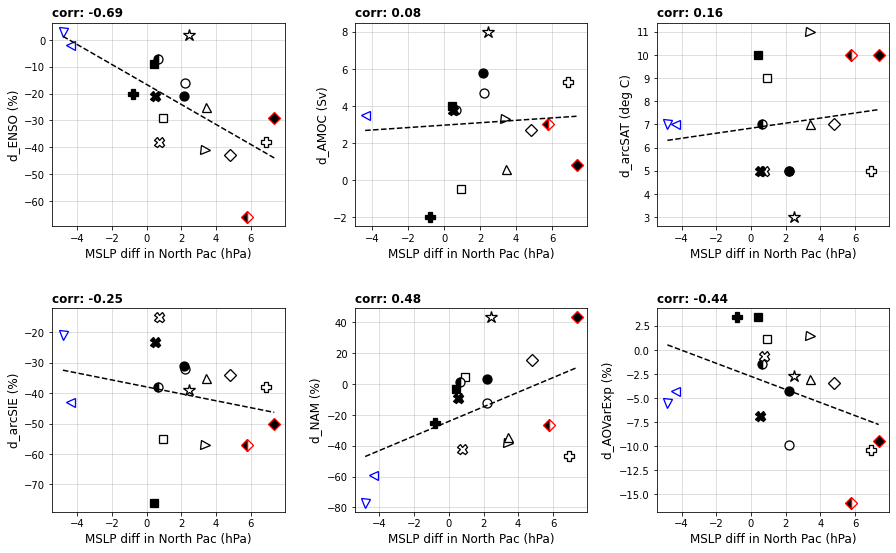

In [314]:
fig = plt.figure(figsize = (15,9), constrained_layout=False)

for i in range(6):
    
    ax = fig.add_subplot(2,3  ,i+1)
    
    var1 = mdiff_NP; var2 = varlist[i];
    
#     ax.scatter(var1, var2)
    for j in range(len(modellist)):
        ax.plot(var1[j], var2[j], label = modellist[j], marker = markers[j], markersize = msize[j], color=colors[j], 
                linestyle='None', markeredgecolor = mecolor[j], fillstyle = fillstyles[j], markerfacecoloralt = 'k', markeredgewidth=1.3)
#     ax.set_xlabel('Horizontal res'+' (deg)', fontsize=12)
    ax.set_xlabel('MSLP diff in North Pac (hPa)', fontsize=12)

    ax.set_ylabel(varnames[i]+' ('+varunits[i]+')', fontsize=12)
    ax.grid(alpha=0.5)
    
    if i == len(corlist1)-1:
        ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1.1), shadow=True, ncol=1, fontsize=9)
    
    idx = np.isfinite(var1) & np.isfinite(var2)
    var1_ = var1[idx]; var2_ = var2[idx];
    linmod = np.polyfit(var1_, var2_, 1); predict = np.poly1d(linmod); #y1 = predict(npacz1)
#     rsq = r2_score(latu1, y1)
    var1_pred = np.array([var1_.min(), var1_.max()]); var2_pred = predict(var1_pred);
    ax.plot(var1_pred, var2_pred, 'k--'); 
    
    corr = np.corrcoef(var1_, var2_)[0,1];  
    ax.set_title(f'corr: {np.round(corr,2)}', fontsize=12, fontweight = 'bold', loc='left')

plt.subplots_adjust(wspace=0.3, hspace=0.4)

# plt.savefig('figures/lots_of_correlation.pdf')


In [253]:
# varlist = [d_enso, d_amoc, d_asat, d_sie, d_namr.values, d_aovara.values, mdiff_NP, sddiff_NP, horres]
# varnames = ['d_ENSO', 'd_AMOC', 'd_arcSAT', 'd_arcSIE', 'd_NAM', 'd_AOVarExp', 'd_mslp_NP', 'd_sdslp_NP', 'horres']

varlist = [d_enso, d_amoc, d_asat, d_sie, d_namr.values, d_npmm, mdiff_NP, sddiff_NP, horres]
varnames = ['d_ENSO', 'd_AMOC', 'd_arcSAT', 'd_arcSIE', 'd_NAM', 'd_NPMM', 'd_mslp_NP', 'd_sdslp_NP', 'horres']

corr = np.empty([len(varlist), len(varlist)])

for i in range(len(varlist)):
    for j in range(len(varlist)):
        
        var1 = varlist[i]; var2 = varlist[j];
        idx = np.isfinite(var1) & np.isfinite(var2)
        var1_ = var1[idx]; var2_ = var2[idx];
        
        corr[i,j] = np.corrcoef(var1_, var2_)[0,1]; 
        
        if (corr[i,j]>0.5 or corr[i,j]<-0.5) and corr[i,j]!=1.:
            print(f'Correlation between {varnames[i]} and {varnames[j]} of {np.round(corr[i,j],2)}')



Correlation between d_ENSO and d_NPMM of 0.56
Correlation between d_ENSO and d_mslp_NP of -0.69
Correlation between d_ENSO and d_sdslp_NP of 0.54
Correlation between d_AMOC and d_arcSAT of -0.65
Correlation between d_arcSAT and d_AMOC of -0.65
Correlation between d_arcSAT and d_arcSIE of -0.75
Correlation between d_arcSAT and horres of -0.62
Correlation between d_arcSIE and d_arcSAT of -0.75
Correlation between d_arcSIE and d_arcSIE of 1.0
Correlation between d_arcSIE and horres of 0.62
Correlation between d_NAM and d_sdslp_NP of -0.55
Correlation between d_NAM and horres of -0.59
Correlation between d_NPMM and d_ENSO of 0.56
Correlation between d_NPMM and d_NPMM of 1.0
Correlation between d_NPMM and d_sdslp_NP of 0.54
Correlation between d_mslp_NP and d_ENSO of -0.69
Correlation between d_mslp_NP and d_sdslp_NP of -0.7
Correlation between d_sdslp_NP and d_ENSO of 0.54
Correlation between d_sdslp_NP and d_NAM of -0.55
Correlation between d_sdslp_NP and d_NPMM of 0.54
Correlation betwee

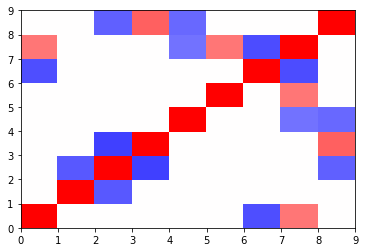

In [321]:
plt.pcolormesh(corr*(corr>0.5) + corr*(corr<-0.5), vmin=-1, vmax=1, cmap='bwr')

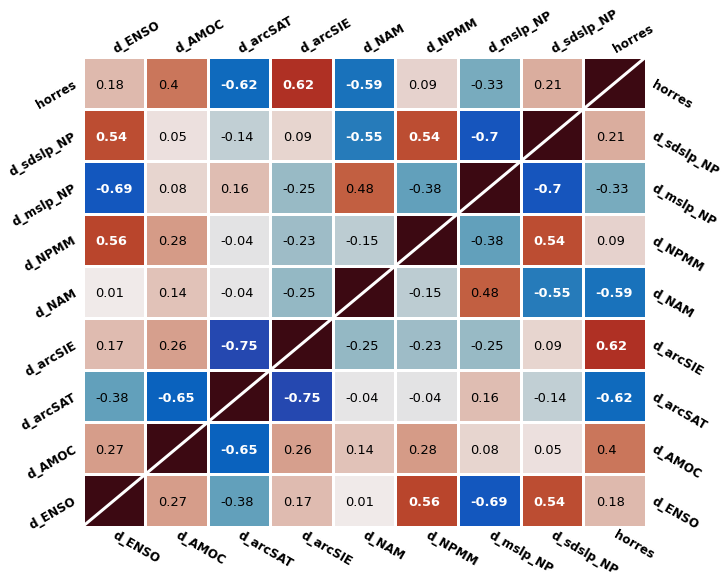

In [254]:
fig = plt.figure(figsize = (10,8), constrained_layout="False")
ax = fig.add_subplot()

Nvars = len(varlist)
coefs = corr

# plot colors
axes = np.arange(0,Nvars+1,1)
ax.pcolormesh(axes, axes, coefs, vmin=-1, vmax = 1, cmap='cmo.balance')
# ax.pcolormesh(axes, axes, coefs*(coefs>0.5) + coefs*(coefs<-0.5), vmin=-1, vmax = 1, cmap='seismic')
ax.plot(axes,axes, '-', linewidth=3, color='w')

xtext = np.empty([Nvars,1]); ytext = np.empty([Nvars,1]);
for i in range(Nvars): xtext[i] = axes[i] + .2; ytext[i] = axes[i] + .4; 
    
# plot corr coeffs
for i in range(Nvars):
    for j in range(Nvars):
        clr = 'k'; fw = 'light';
        if coefs[i,j]>0.5 or coefs[i,j]<-0.5: clr = 'w'; fw = 'bold';
        if abs(coefs[i,j])>0.01 and coefs[i,j]<0.99: ax.text(xtext[j], ytext[i], np.round(coefs[i,j],2), fontsize = 13, fontweight = fw, color = clr)
        if abs(coefs[i,j])<0.01: ax.text(xtext[j], ytext[i], '0.', fontsize = 13, fontweight = fw, color = clr)
            
ax.set_xticks(np.arange(.5,Nvars+0.5,1)); ax.set_xticklabels(varnames, fontsize = 12, fontweight = 'bold');
ax.set_yticks(np.arange(.5,Nvars+0.5,1)); ax.set_yticklabels(varnames, fontsize = 12, fontweight = 'bold');
ax.tick_params(labelbottom=True, labeltop=True, labelleft=True, labelright=True, bottom=False, top=False, left=False, right=False)

plt.setp([tick.label1 for tick in ax.xaxis.get_major_ticks()], rotation=-30, ha="left", va="center", rotation_mode="anchor")
plt.setp([tick.label2 for tick in ax.xaxis.get_major_ticks()], rotation=30, ha="left", va="center", rotation_mode="anchor")

plt.setp([tick.label1 for tick in ax.yaxis.get_major_ticks()], rotation=30, ha="right", va="center", rotation_mode="anchor")
plt.setp([tick.label2 for tick in ax.yaxis.get_major_ticks()], rotation=-30, ha="left", va="center", rotation_mode="anchor")

# ax.text(.5, 5.8, 'CR20', fontsize = 16, fontweight = 'bold')
# ax.text(3.5, -1.2, 'E280', fontsize = 16, fontweight = 'bold')

for spine in ax.spines.values(): spine.set_edgecolor('w')
    
for i in range(Nvars+1):
    ax.plot([0,Nvars], [i,i], 'w', linewidth=3)
    ax.plot([i,i], [0, Nvars], 'w', linewidth=3)
    
# plt.savefig('figures/corrcoeff_matrix.png')

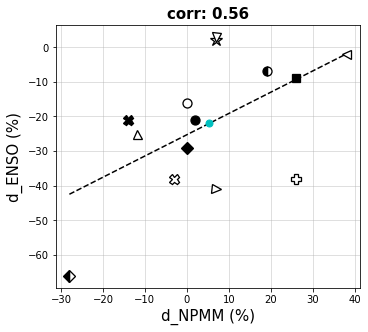

In [282]:
fig = plt.figure(figsize = (5,4.5), constrained_layout=True)
ax = fig.add_subplot()

I = 8; J = 4;
# var1 = varlist[I]; var2 = varlist[J];
var1 = d_npmm; var2 = d_enso;

idx = np.isfinite(var1) & np.isfinite(var2)
var1_ = var1[idx]; var2_ = var2[idx];
linmod = np.polyfit(var1_, var2_, 1); predict = np.poly1d(linmod); #y1 = predict(npacz1)
#     rsq = r2_score(latu1, y1)
var1_pred = np.array([var1_.min(), var1_.max()]); var2_pred = predict(var1_pred);
ax.plot(var1_pred, var2_pred, 'k--'); 

for j in range(len(modellist)):
    ax.plot(var1[j], var2[j], label = modellist[j], marker = markers[j], markersize = msize[j], color=colors[j], 
            linestyle='None', markeredgecolor = mecolor[j], fillstyle = fillstyles[j], markerfacecoloralt = 'k', markeredgewidth=1.3)

ax.plot(np.mean(var1_), np.mean(var2_), marker = '.', color='c', markersize=14)
    
# ax.set_xlabel(varnames[I], fontsize=15)
# ax.set_ylabel(varnames[J], fontsize=15)
ax.set_xlabel('d_NPMM (%)', fontsize=15); ax.set_ylabel('d_ENSO (%)', fontsize=15)
ax.grid(alpha=0.5)

corr = np.corrcoef(var1_, var2_)[0,1];  
ax.set_title(f'corr: {np.round(corr,2)}', fontsize=15, fontweight = 'bold', loc='center')

plt.savefig('figures/corr_NPMM_ENSO.png')


In [ ]:
folder = 'PlioMIP2 data/'
sim1 = 'E280';   filename1 = 'E280_slp_january.nc';
sim2 = 'Eoi400'; filename2 = 'Eoi400_slp_january.nc';
N = len(modellist)

fig = plt.figure(figsize = (12,30), constrained_layout=False)

for i in range(N):
    model = modellist[i]

    ds1 = xr.open_dataset(folder+model+'/'+sim1+'/'+filename1)
    mslp1  = ds1.slp.sel(lat=slice(0,85)).mean("time")
    sdslp1 = ds1.slp.sel(lat=slice(0,85)).std("time")

    ds2 = xr.open_dataset(folder+model+'/'+sim2+'/'+filename2)
    mslp2  = ds2.slp.sel(lat=slice(0,85)).mean("time")
    sdslp2 = ds2.slp.sel(lat=slice(0,85)).std("time")

    mdiff = mslp2 - mslp1
    sddiff = sdslp2 - sdslp1

    ax = fig.add_subplot(N,2,2*i+1, projection=ccrs.PlateCarree(central_longitude=clon))
    
    
#     mdiff.plot(ax=ax, transform = ccrs.PlateCarree(), vmin=-16, vmax=16, cmap = 'cmo.balance', cbar_kwargs={'label':'(hPa)', 'fraction':0.02})
    ax.coastlines(linewidth=.5, alpha=.5)
    ax.set_title(f'{model}', fontsize = 16, loc='left')
    ax.set_title(f'd MSLP', fontsize = 14, loc='right')

    ax = fig.add_subplot(N,2,2*i+2, projection=ccrs.PlateCarree(central_longitude=clon))
    
    
#     sddiff.plot(ax=ax, transform = ccrs.PlateCarree(), vmin=-4, vmax=4, cmap = 'cmo.balance', cbar_kwargs={'label':'(hPa)', 'fraction':0.02})
    ax.coastlines(linewidth=.5, alpha=.5)
    ax.set_title(f'd SLP SD', fontsize = 14, loc='right')

# plt.savefig('figures/Eoi400minE280_SLPs.png')
# plt.savefig('figures/Eoi400minE280_SLPs.pdf')

In [12]:
janslp = xr.open_dataset(folder+'interpolated_january_slps.nc')
djfslp = xr.open_dataset(folder+'interpolated_DJF_slps.nc')

In [403]:
djfslp

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, model: 17, sim: 3)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * model    (model) object 'CCSM4' 'CCSM4-UoT' ... 'NorESM-L' 'NorESM1-F'
  * sim      (sim) object 'E280' 'Eoi400' 'diff'
Data variables:
    slpsd    (sim, model, lat, lon) float64 ...
    mslp     (sim, model, lat, lon) float64 ...

In [246]:
dummie = djfslp.mslp.mean("sim")
zeros      = xr.DataArray(np.zeros((17,96,144)), dims=dummie.dims, coords=dummie.coords);
d_enso_map = xr.DataArray(np.zeros((17,96,144)), dims=dummie.dims, coords=dummie.coords); 
d_npmm_map = xr.DataArray(np.zeros((17,96,144)), dims=dummie.dims, coords=dummie.coords);
d_amoc_map = xr.DataArray(np.zeros((17,96,144)), dims=dummie.dims, coords=dummie.coords); 
d_asat_map = xr.DataArray(np.zeros((17,96,144)), dims=dummie.dims, coords=dummie.coords); 
d_sie_map  = xr.DataArray(np.zeros((17,96,144)), dims=dummie.dims, coords=dummie.coords); 

for i in range(len(modellist)):
    ref = (1 + zeros[i,:,:])
    d_enso_map[i,:,:] = d_enso[i] * ref;
    d_npmm_map[i,:,:] = d_npmm[i] * ref;
    d_amoc_map[i,:,:] = d_amoc[i] * ref;
    d_asat_map[i,:,:] = d_asat[i] * ref;
    d_sie_map[i,:,:]  = d_sie[i]  * ref;

In [247]:
mdiffs = djfslp.mslp.sel(sim='diff') 
sddiffs = djfslp.slpsd.sel(sim='diff') 

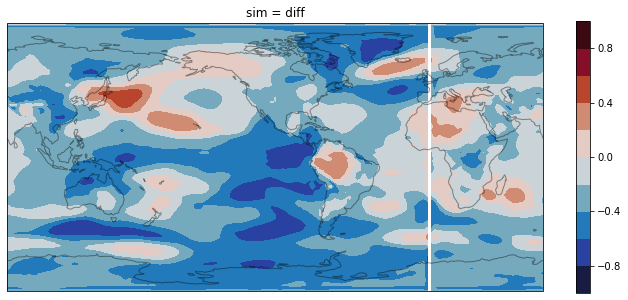

In [286]:
fig = plt.figure(figsize = (12,5), constrained_layout=False)
clon=-105
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree(central_longitude=clon))

y = xr.corr(sddiffs, d_asat_map, dim='model')
y.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap = 'cmo.balance', levels=np.arange(-1,1.1,0.2))
ax.coastlines(alpha=0.4)

# ax.set_title('ensemble correlation between ENSO change and DJF SLP SD', fontsize=14)

# plt.savefig('figures/ensemblecorrelation_slpsd_enso.png')

In [234]:
y.max()

<xarray.DataArray ()>
array(0.92247473)
Coordinates:
    sim      <U4 'diff'

In [198]:
mdiffs1 = janslp.mslp.sel(sim='diff') 
mdiffs2 = djfslp.mslp.sel(sim='diff') 

x1 = xr.corr(mdiffs1, d_enso_map, dim='model')
x2 = xr.corr(mdiffs2, d_enso_map, dim='model')

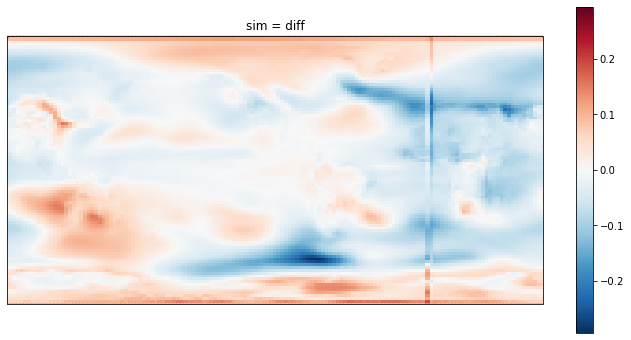

In [199]:
fig = plt.figure(figsize = (12,6), constrained_layout=False)
clon=-105
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree(central_longitude=clon))

(x2-x1).plot(ax=ax, transform=ccrs.PlateCarree())

In [200]:
(x2-x1).mean()

<xarray.DataArray ()>
array(-0.00497216)
Coordinates:
    sim      <U4 'diff'